In [1]:
# Packages
import pandas as pd
import numpy as np
import warnings
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [2]:
dt_15_16 = 'https://raw.githubusercontent.com/Muthusachu/Singapore-Resale-Flat-Prices-Predicting/main/Date%20Jan2015-Dec2016.csv'
dt_17totil = 'https://raw.githubusercontent.com/Muthusachu/Singapore-Resale-Flat-Prices-Predicting/main/Date%20Jan2017onwards.csv'


In [3]:
df_15_16 = pd.read_csv(dt_15_16)

df_17totil = pd.read_csv(dt_17totil)

In [4]:
lst_df = [df_15_16, df_17totil]


In [5]:
for i in lst_df:
  print(i.shape)

(37153, 11)
(180962, 11)


In [6]:
result = pd.concat([df_15_16, df_17totil], axis=0, ignore_index= True)

In [7]:
result.head()

month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   
2  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4     01 TO 03   
3  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10     01 TO 03   
4  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date remaining_lease  \
0            60.0        Improved                 1986              70   
1            68.0  New Generation                 1981              65   
2            69.0  New Generation                 1980              64   
3            68.0  New Generation                 1979              63   
4            68.0  New Generation                 1980              64   

   resale_price  
0      255000.0  
1      275000.0  
2      285000.0  
3      290000.0  
4      290000.0

In [8]:
result.to_csv('SingaporeFulldata.csv', index=False)

# EDA -- : Data Preprocessing

In [9]:
eda_df = pd.read_csv('/content/SingaporeFulldata.csv')

In [10]:
# Check if any NaN values are present in each column
columns_with_nan = eda_df.isnull().sum()
print(columns_with_nan)


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64


In [11]:
eda_df.head(2)

month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date remaining_lease  \
0            60.0        Improved                 1986              70   
1            68.0  New Generation                 1981              65   

   resale_price  
0      255000.0  
1      275000.0

In [12]:
eda_df['Month_C'] = pd.to_datetime(eda_df['month'], format='%Y-%m').dt.month

In [13]:
eda_df['Year_C'] = pd.to_datetime(eda_df['month'], format='%Y-%m').dt.year

In [14]:
eda_df[["storey_start", "storey_end"]] = eda_df['storey_range'].str.split(' TO ', expand=True)

In [15]:
eda_df = eda_df.drop(['storey_range'], axis=1)

In [16]:
eda_df['Address'] = eda_df['block'] + ', ' + eda_df['street_name']

In [17]:
eda_df = eda_df.drop(['month','block', 'street_name'], axis=1)

In [18]:
eda_df.head(1)

town flat_type  floor_area_sqm flat_model  lease_commence_date  \
0  ANG MO KIO    3 ROOM            60.0   Improved                 1986   

  remaining_lease  resale_price  Month_C  Year_C storey_start storey_end  \
0              70      255000.0        1    2015           07         09   

                 Address  
0  174, ANG MO KIO AVE 4

In [19]:
cat_cols = ['town', 'flat_type', 'flat_model', 'Address']

In [20]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform the data
for col in cat_cols:
  eda_df[col+"_EC"] = label_encoder.fit_transform(eda_df[col])

In [21]:
eda_df.drop(columns=cat_cols, axis=1, inplace=True)

In [22]:
eda_df.head(1)

floor_area_sqm  lease_commence_date remaining_lease  resale_price  Month_C  \
0            60.0                 1986              70      255000.0        1   

   Year_C storey_start storey_end  town_EC  flat_type_EC  flat_model_EC  \
0    2015           07         09        0             2              5   

   Address_EC  
0        1635

In [23]:
# Initialize the YEAR and MONTH columns with 0
eda_df['remaining_lease_years'] = 0
eda_df['remaining_lease_months'] = 0

# Loop through each row in the DataFrame
for i, row in eda_df.iterrows():
  duration = row['remaining_lease']

  # Check if the value is numeric
  if duration.isnumeric():
    if isinstance(int(duration), (int, float)):
      eda_df.at[i, 'remaining_lease_years'] = duration  # Assign the numeric value to the 'remaining_lease_years' column
      eda_df.at[i, 'remaining_lease_months'] = 0  # Set the 'remaining_lease_months' column to 0

  else:
    # Split the string into parts
    parts = duration.split()
    for j in range(len(parts)):
      if parts[j] == 'years' or parts[j] == 'year':
        eda_df.at[i, 'remaining_lease_years'] = int(parts[j-1])  # Assign the number preceding 'years' or 'year' to the 'remaining_lease_years' column
      elif parts[j] == 'months' or parts[j] == 'month':
        eda_df.at[i, 'remaining_lease_months'] = int(parts[j-1])  # Assign the number preceding 'months' or 'month' to the 'remaining_lease_months' column



In [24]:
eda_df.head(2)

floor_area_sqm  lease_commence_date remaining_lease  resale_price  Month_C  \
0            60.0                 1986              70      255000.0        1   
1            68.0                 1981              65      275000.0        1   

   Year_C storey_start storey_end  town_EC  flat_type_EC  flat_model_EC  \
0    2015           07         09        0             2              5   
1    2015           01         03        0             2             12   

   Address_EC remaining_lease_years  remaining_lease_months  
0        1635                    70                       0  
1        6596                    65                       0

In [25]:
eda_df.drop(columns=['remaining_lease'], axis=1, inplace=True)

In [26]:
eda_df.dtypes

floor_area_sqm            float64
lease_commence_date         int64
resale_price              float64
Month_C                     int32
Year_C                      int32
storey_start               object
storey_end                 object
town_EC                     int64
flat_type_EC                int64
flat_model_EC               int64
Address_EC                  int64
remaining_lease_years      object
remaining_lease_months      int64
dtype: object

In [27]:
eda_df['remaining_lease_years'] = eda_df['remaining_lease_years'].astype(int)

In [28]:
eda_df['storey_start'] = eda_df['storey_start'].astype(int)

In [29]:
eda_df['storey_end'] = eda_df['storey_end'].astype(int)

In [30]:
eda_df.dtypes

floor_area_sqm            float64
lease_commence_date         int64
resale_price              float64
Month_C                     int32
Year_C                      int32
storey_start                int64
storey_end                  int64
town_EC                     int64
flat_type_EC                int64
flat_model_EC               int64
Address_EC                  int64
remaining_lease_years       int64
remaining_lease_months      int64
dtype: object

In [31]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot
  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot
  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

<ipython-input-31-36a115e74619>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-31-36a115e74619>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-31-36a115e74619>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in s

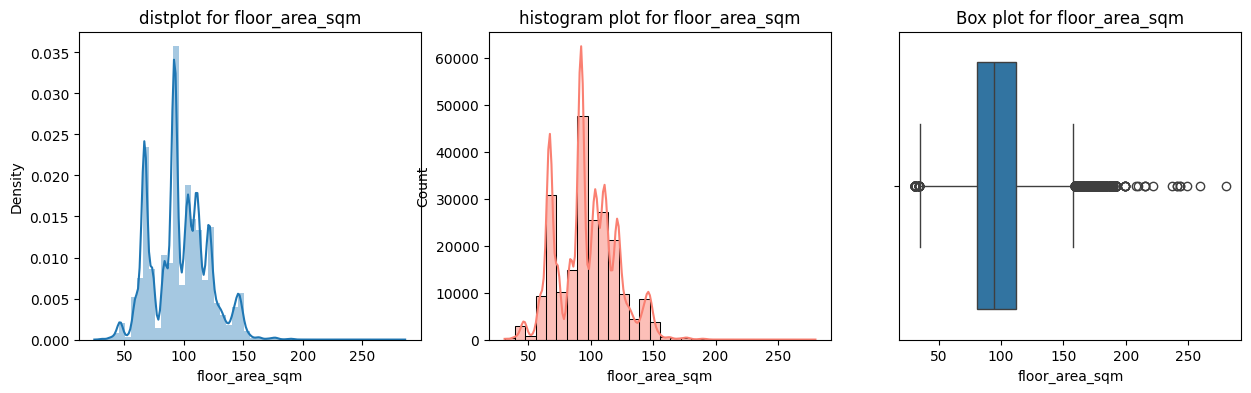

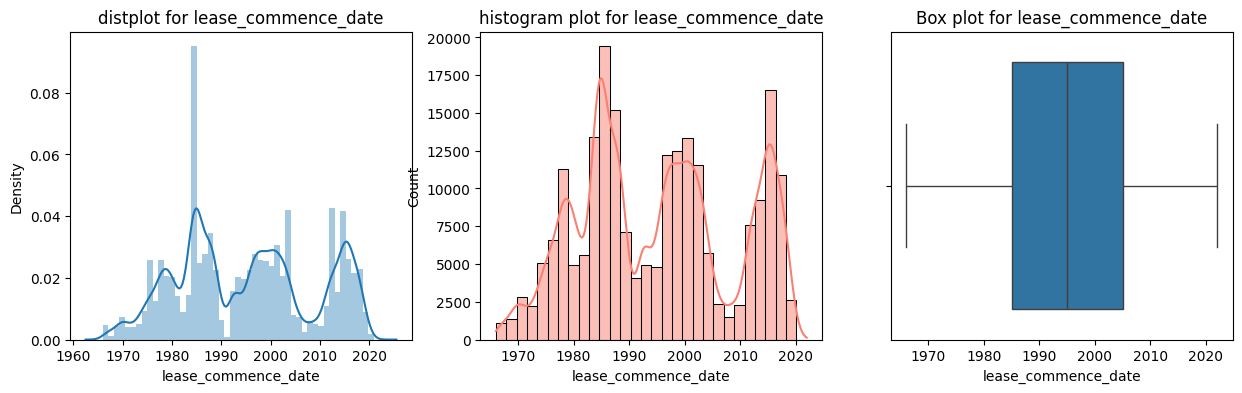

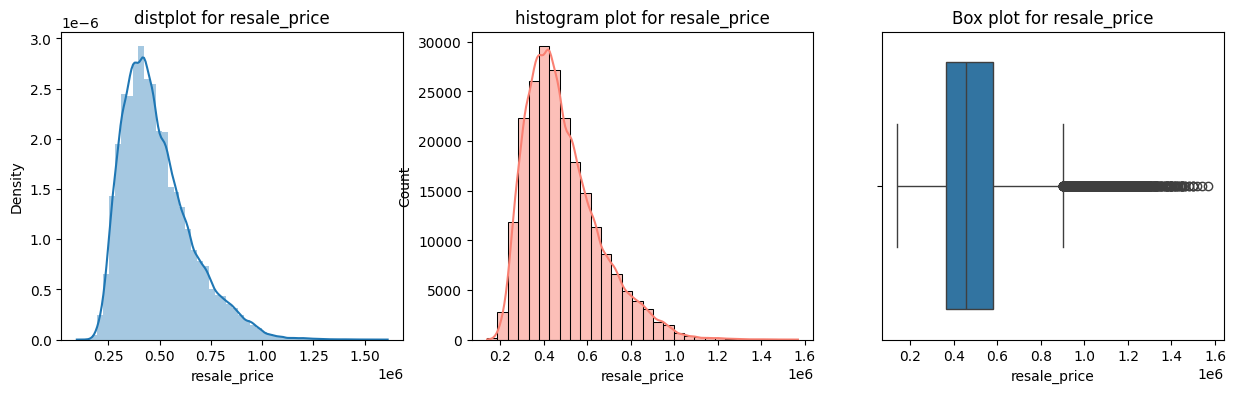

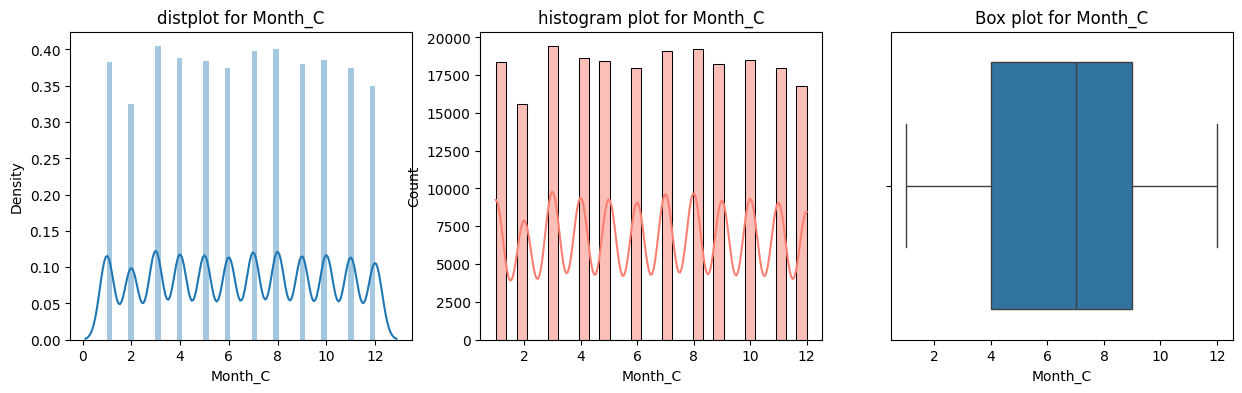

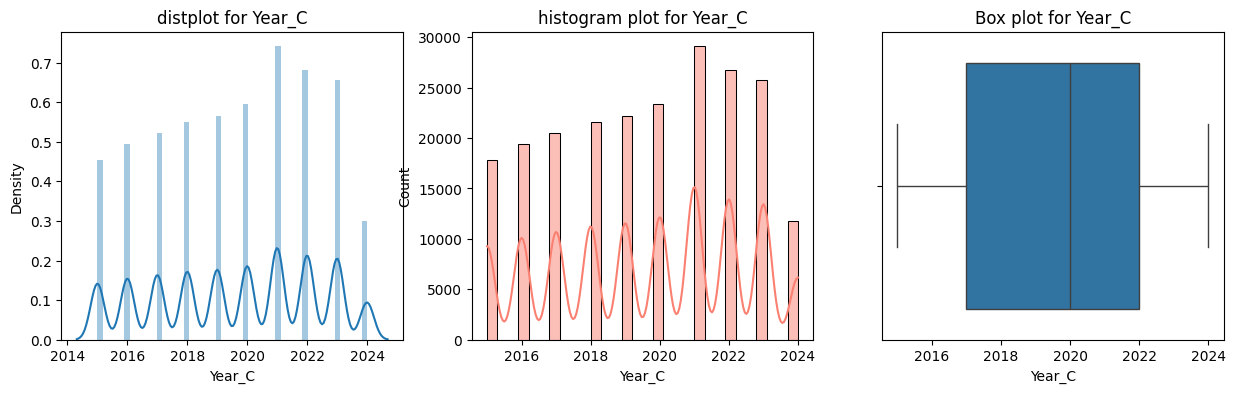

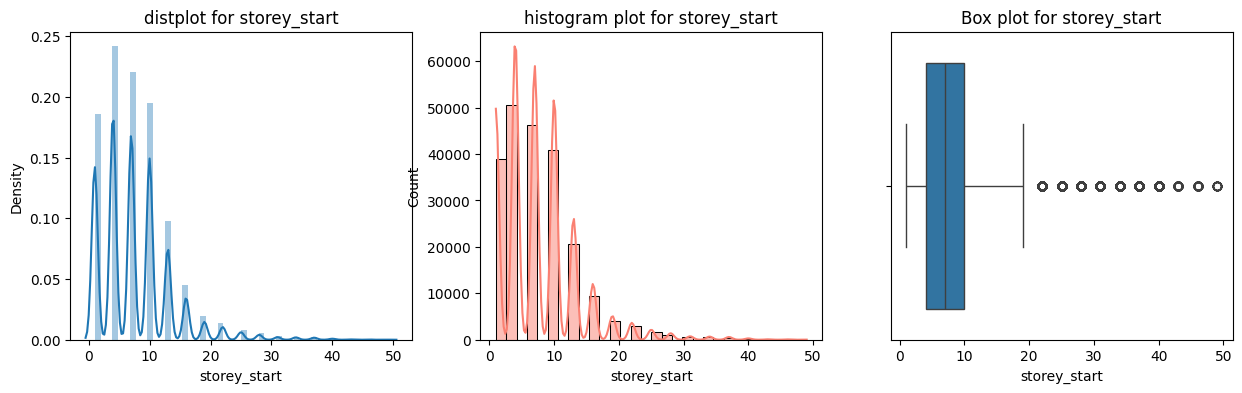

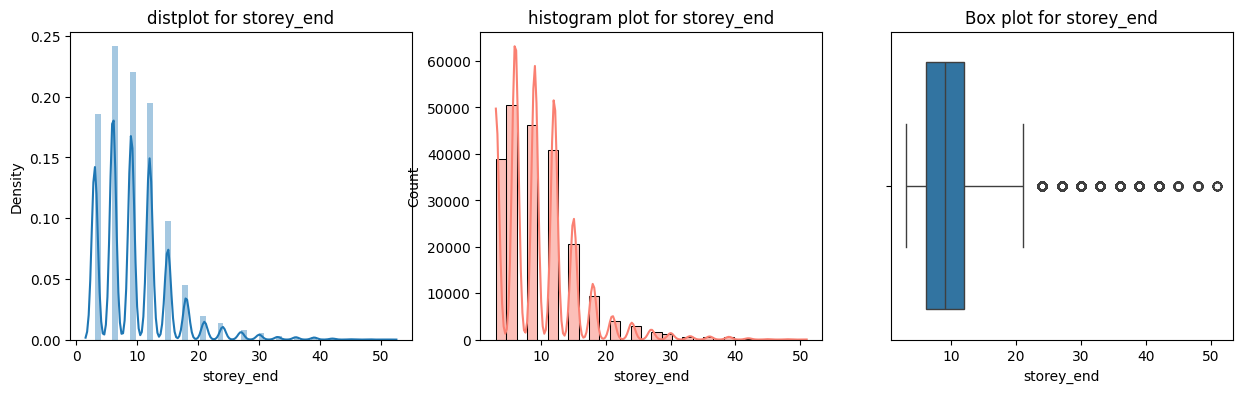

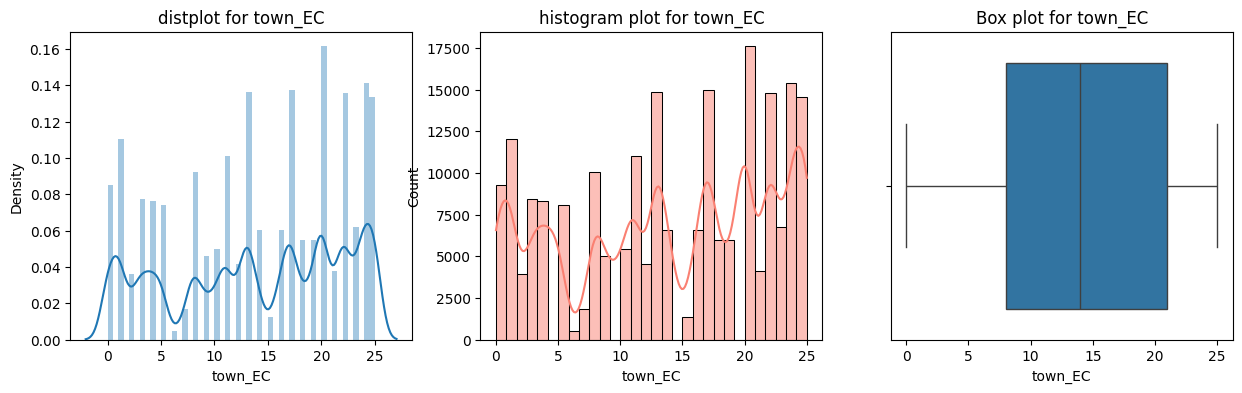

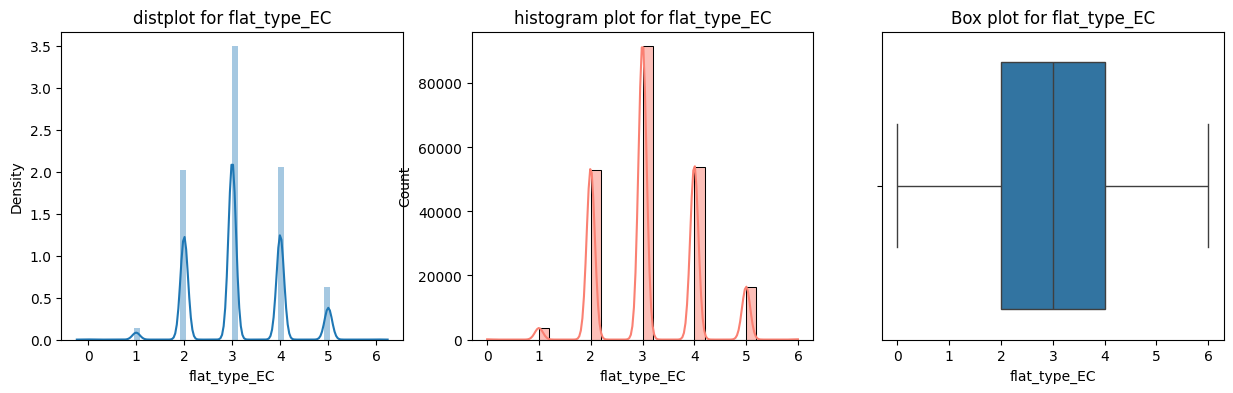

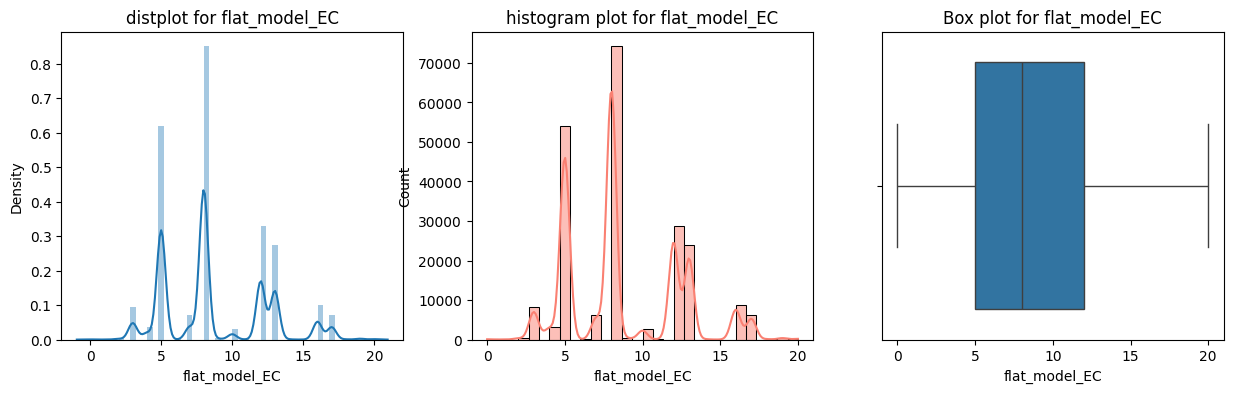

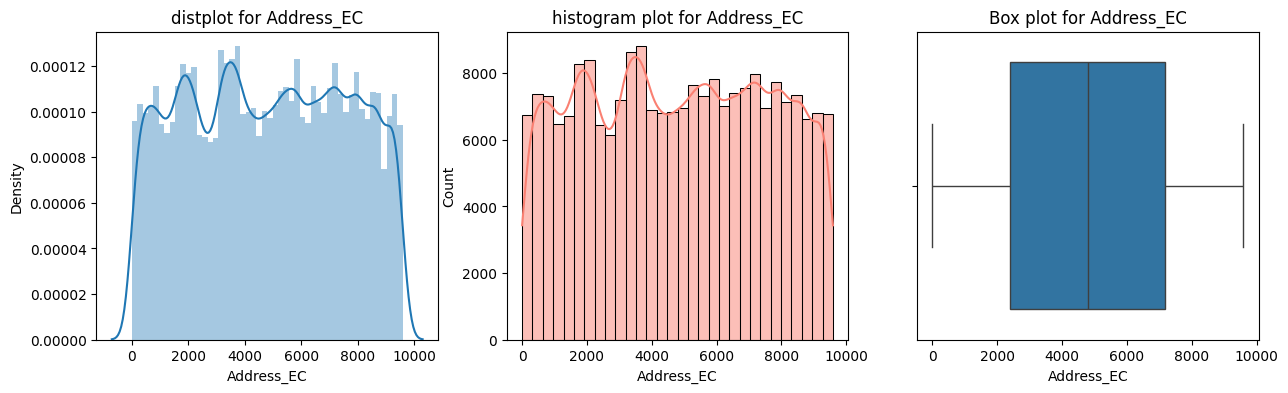

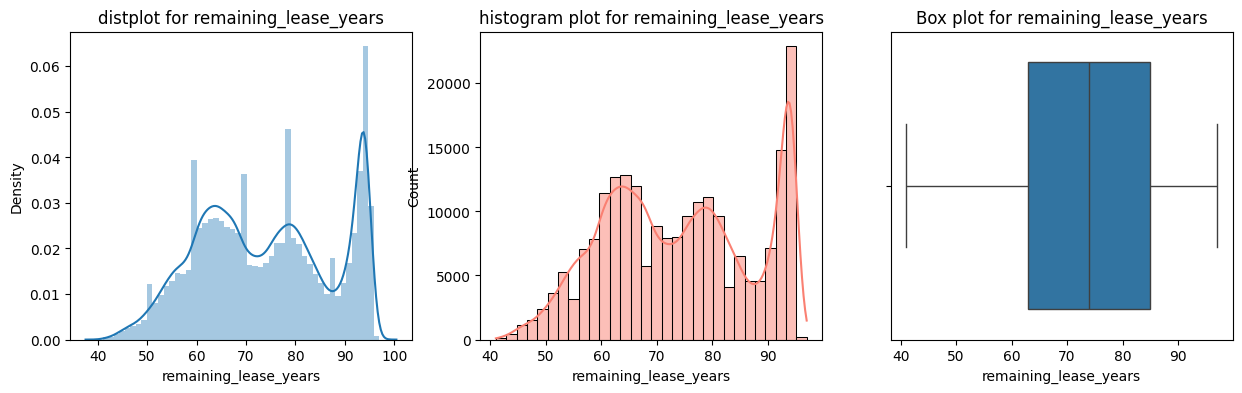

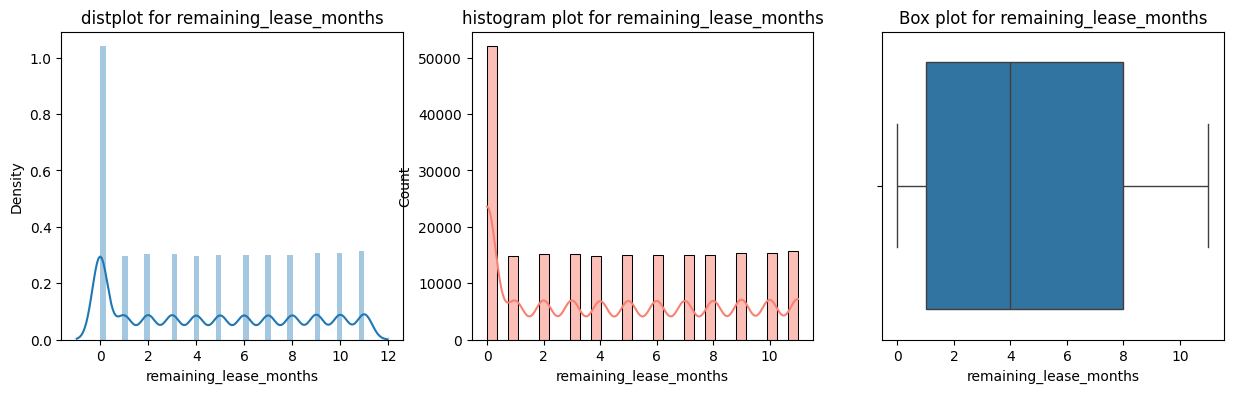

In [32]:
for i in eda_df.columns:
  plot(eda_df,i)

In [33]:
eda_df.shape

(218115, 13)

In [34]:
eda_df.columns

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price', 'Month_C',
       'Year_C', 'storey_start', 'storey_end', 'town_EC', 'flat_type_EC',
       'flat_model_EC', 'Address_EC', 'remaining_lease_years',
       'remaining_lease_months'],
      dtype='object')

In [35]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_bound_range= q3 + (1.5*iqr)
  lower_bound_range= q1 - (1.5*iqr)

  df[column]= df[column].clip( lower_bound_range, upper_bound_range)

In [36]:
for i in eda_df.columns:
  outlier(eda_df,i)

In [37]:
eda_df.shape

(218115, 13)

<ipython-input-31-36a115e74619>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-31-36a115e74619>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-31-36a115e74619>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in s

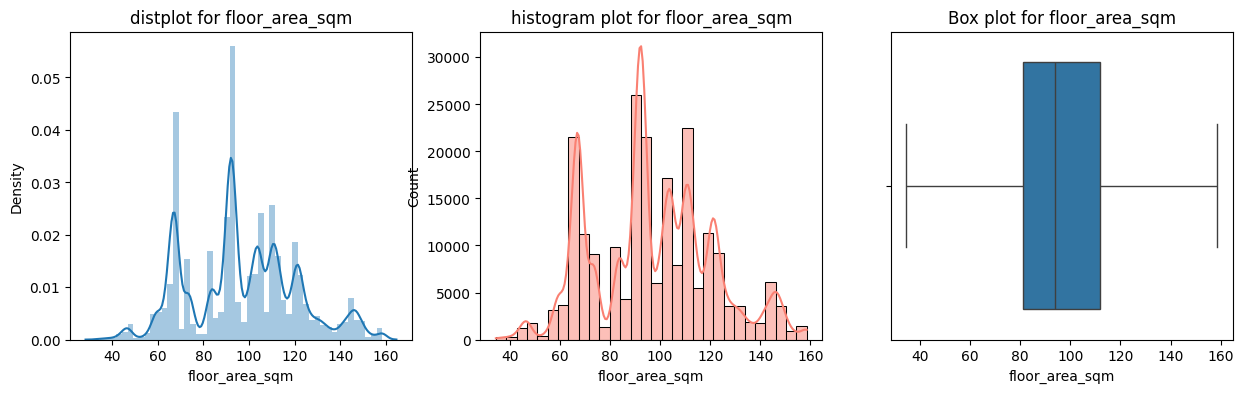

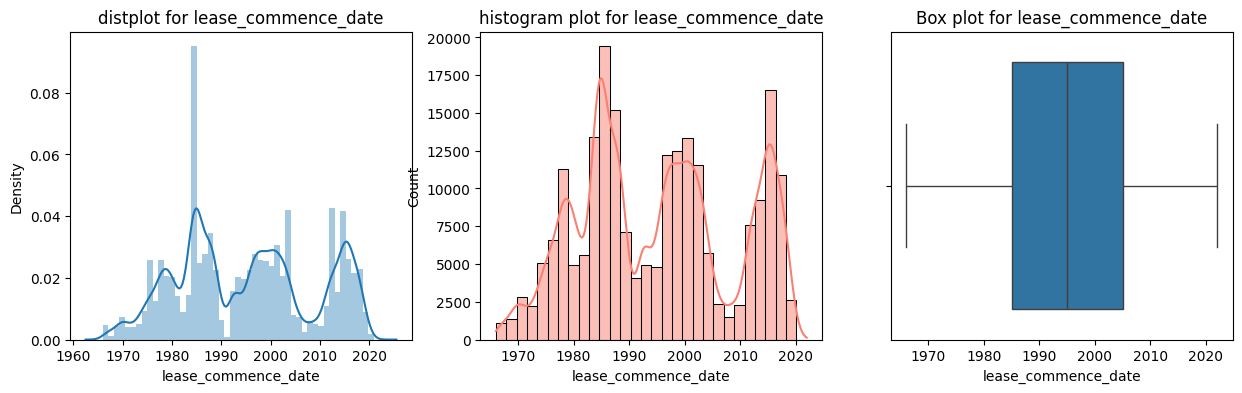

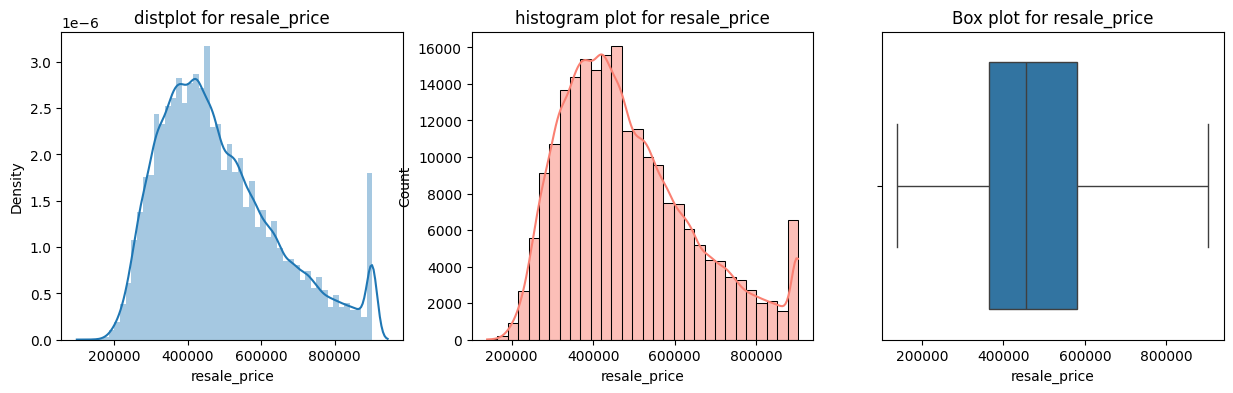

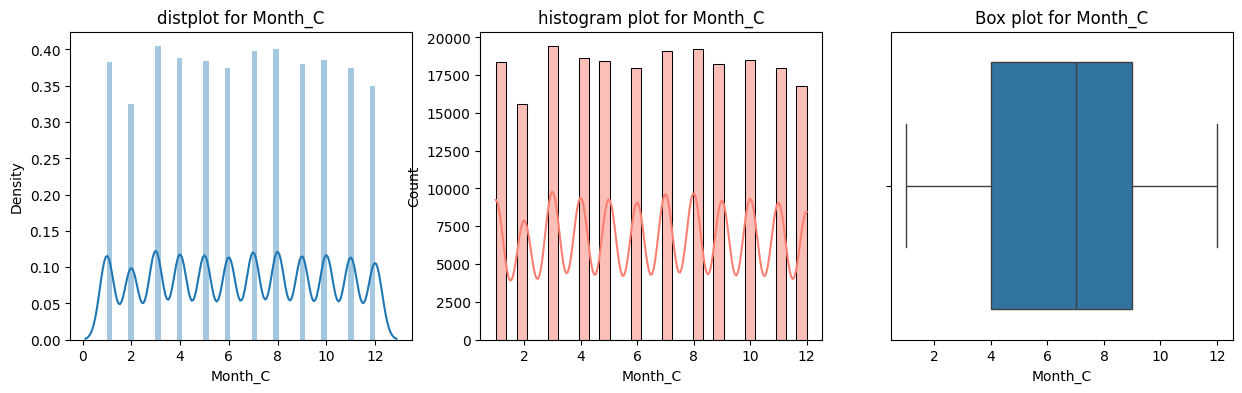

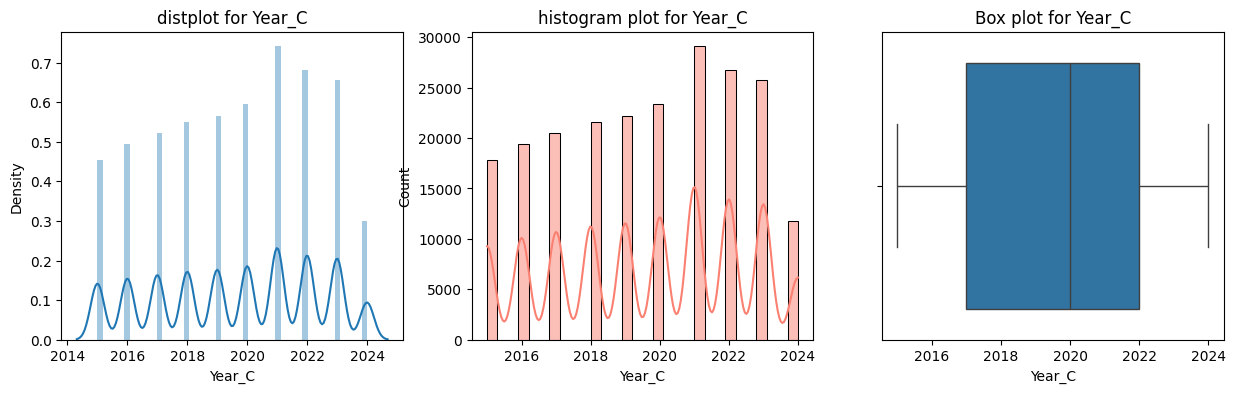

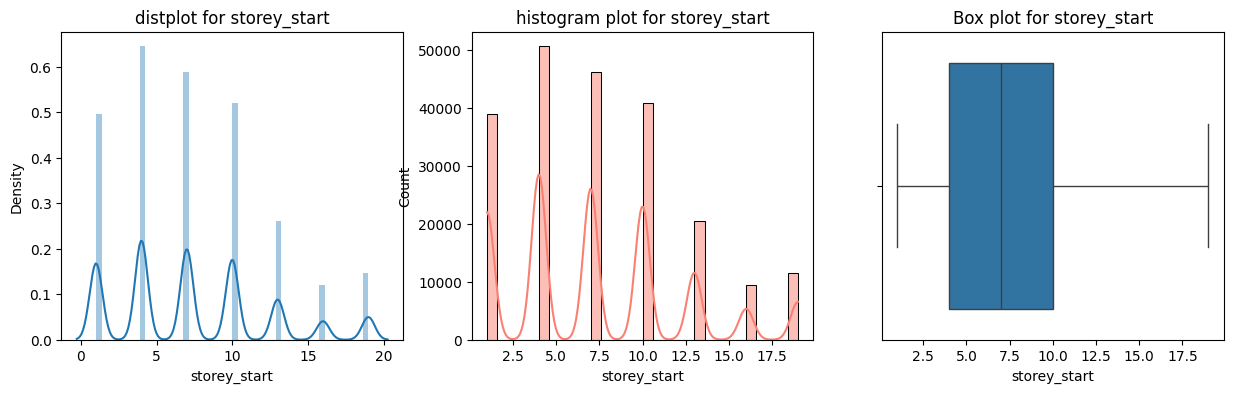

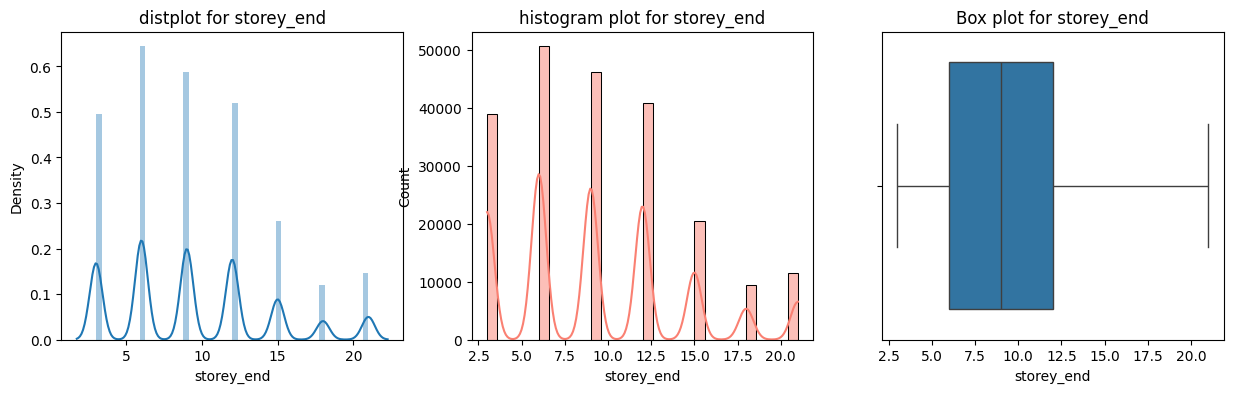

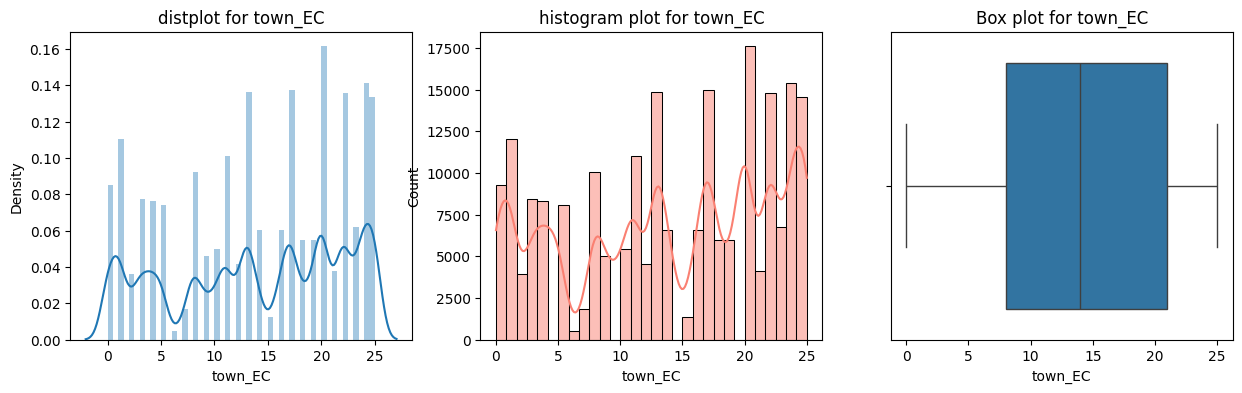

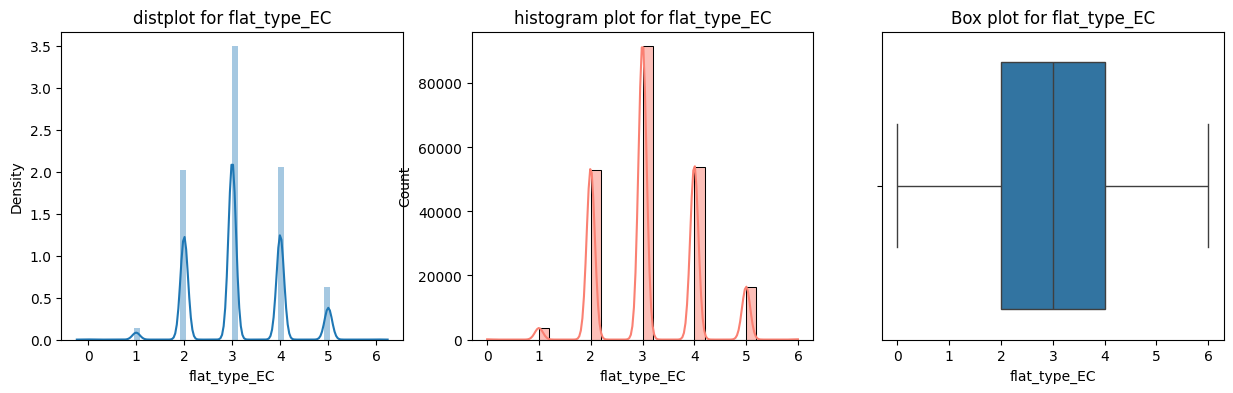

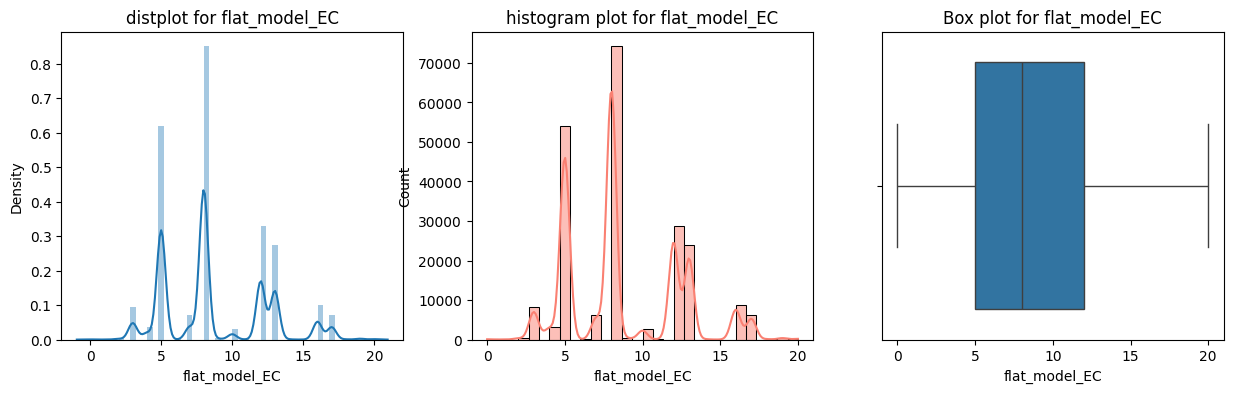

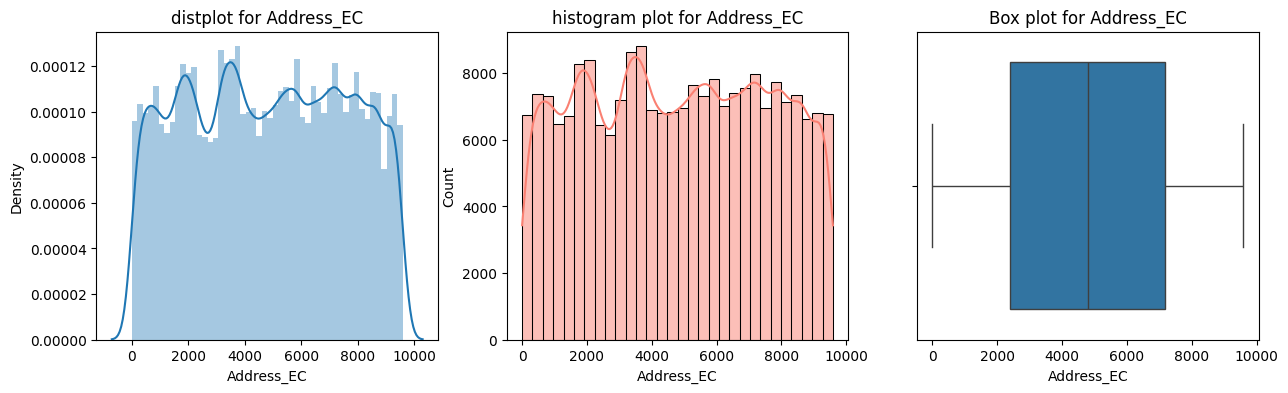

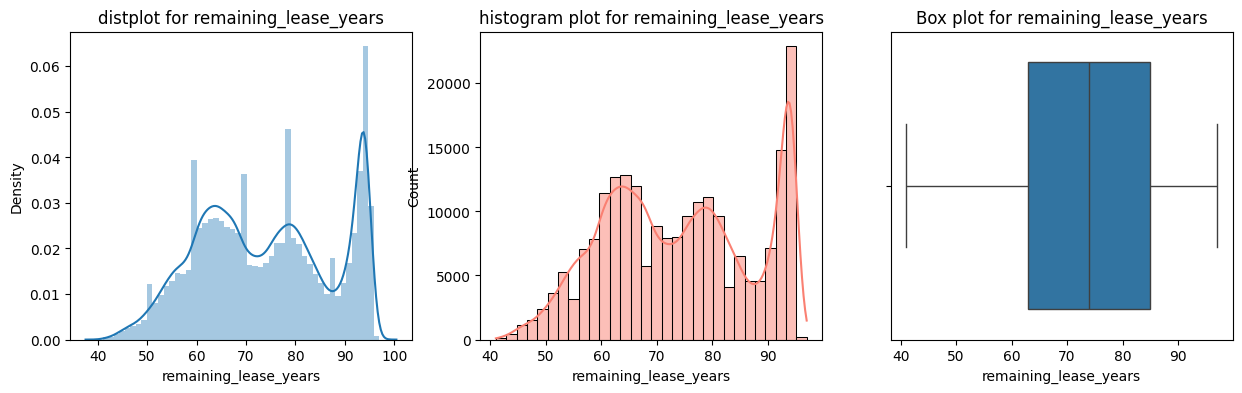

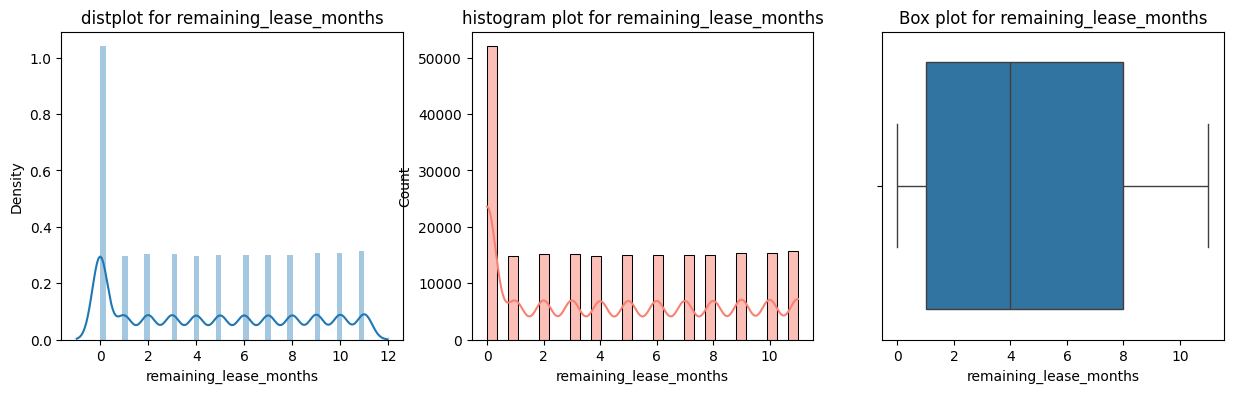

In [38]:
for i in eda_df.columns:
  plot(eda_df,i)

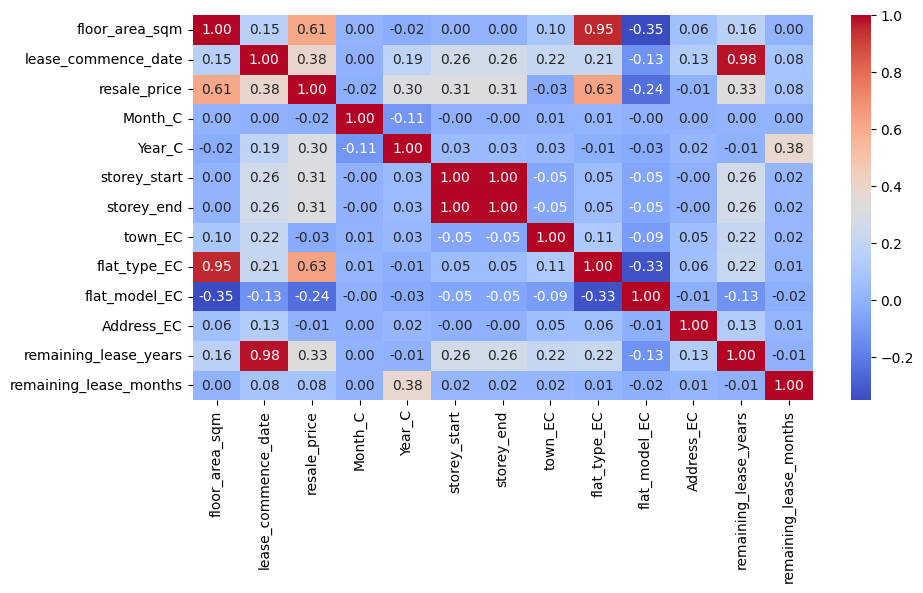

In [39]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(eda_df.corr(), annot= True, cmap="coolwarm", fmt="0.2f")
plt.show()

In [40]:
dff= eda_df.copy()

In [41]:
weak_correlations = ['Month_C']

In [42]:
df_dropped = dff.drop(columns=weak_correlations, axis=1)

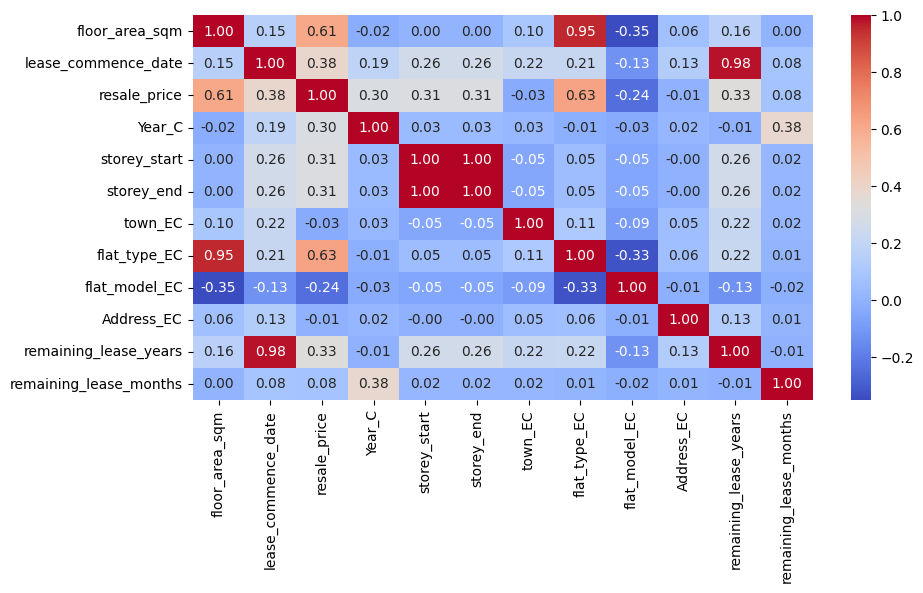

In [43]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_dropped.corr(), annot= True, cmap="coolwarm", fmt="0.2f")
plt.show()

<ipython-input-31-36a115e74619>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-31-36a115e74619>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-31-36a115e74619>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in s

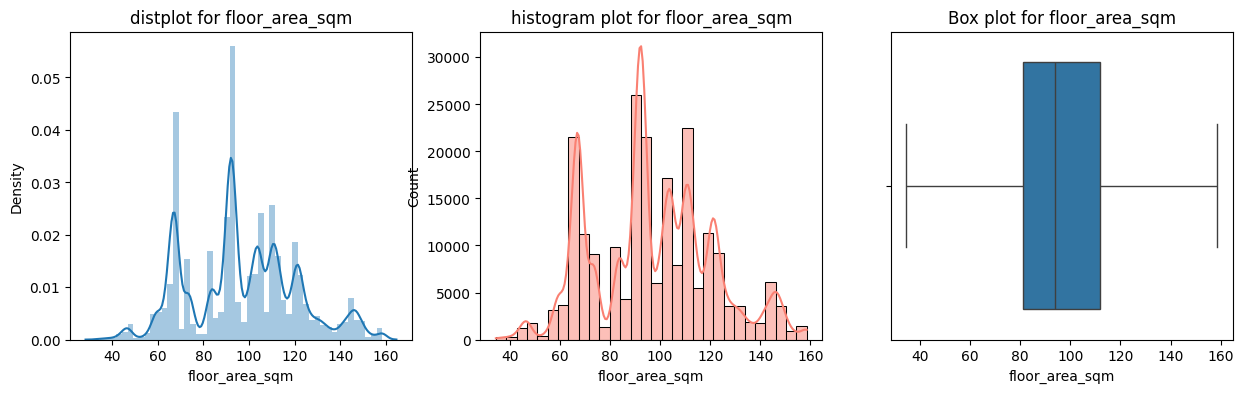

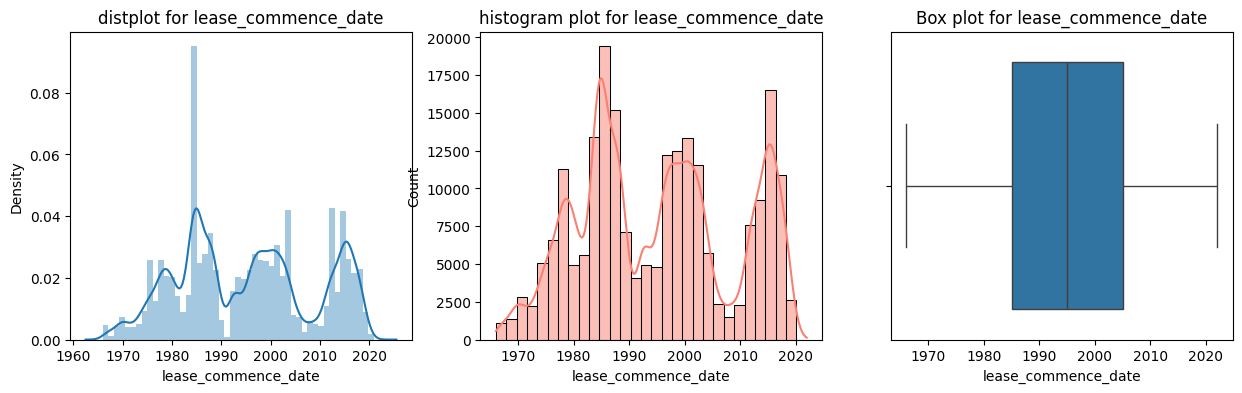

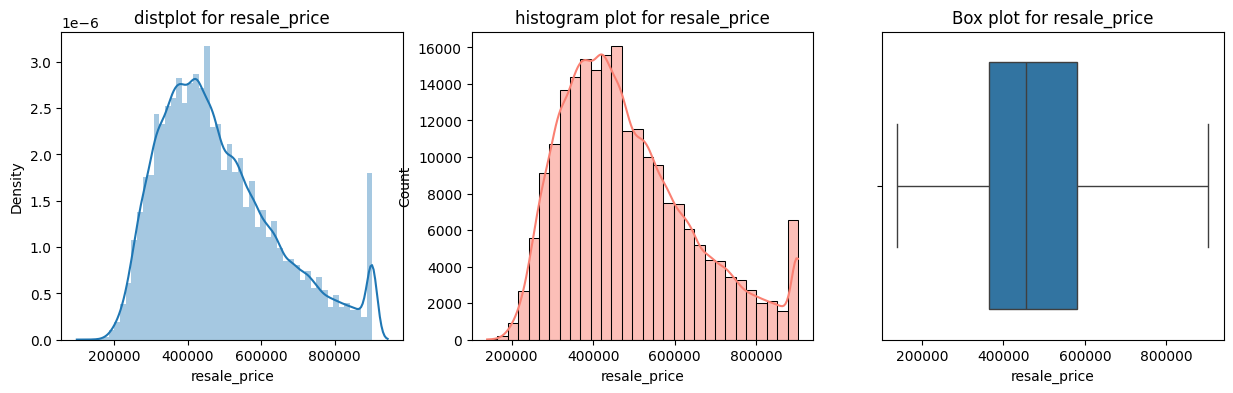

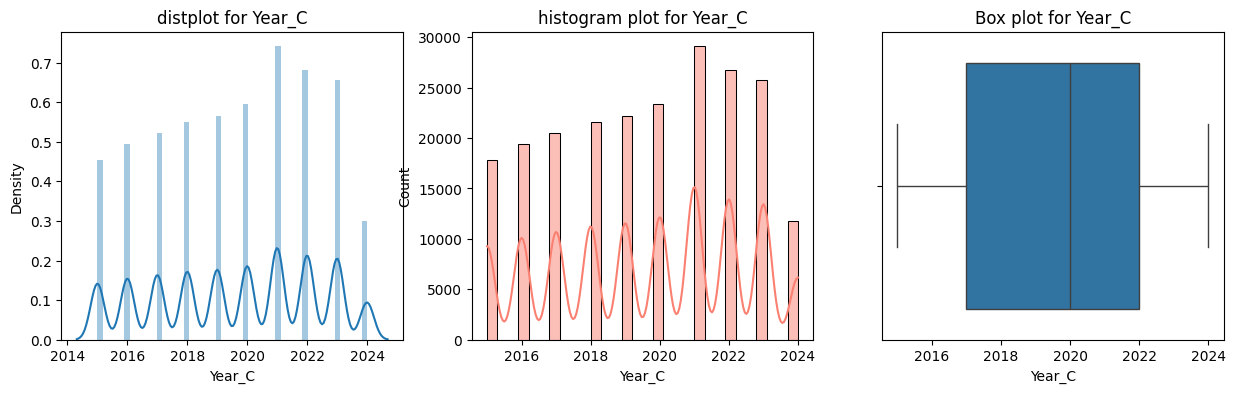

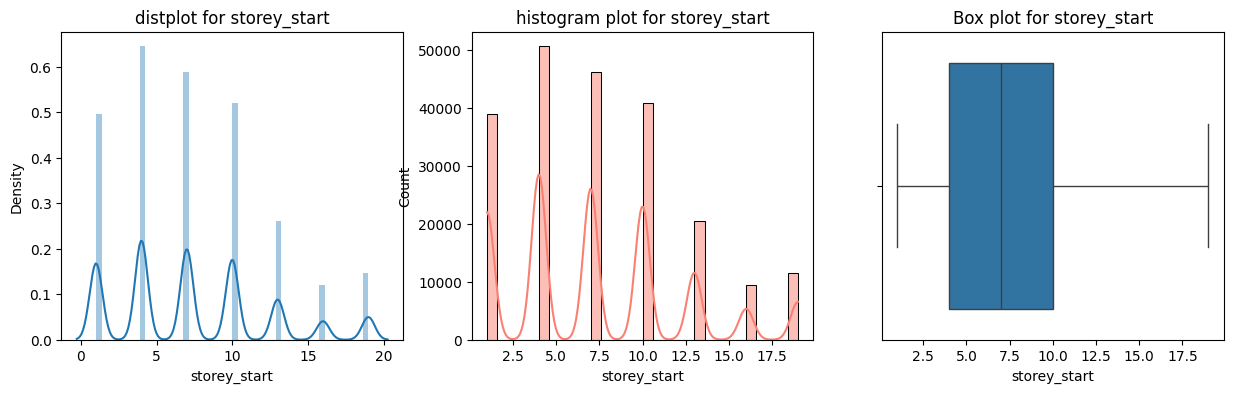

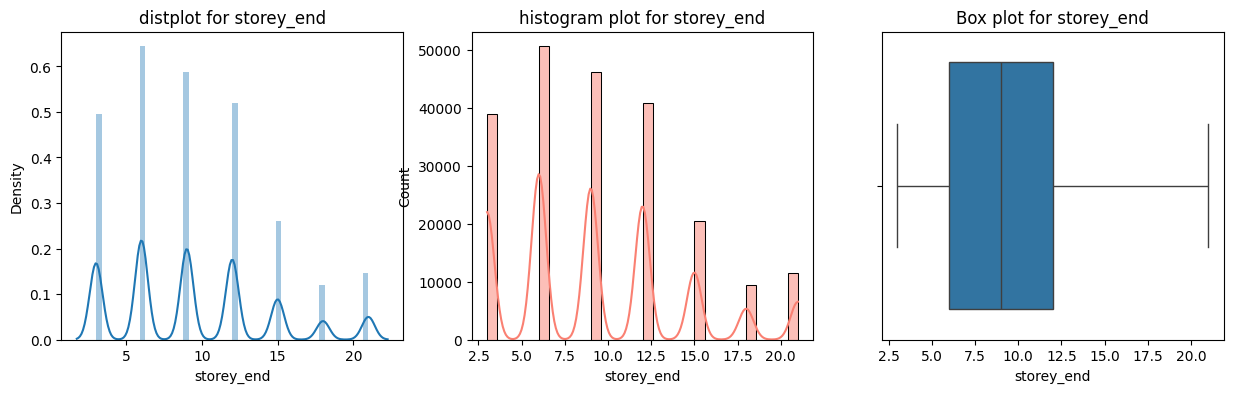

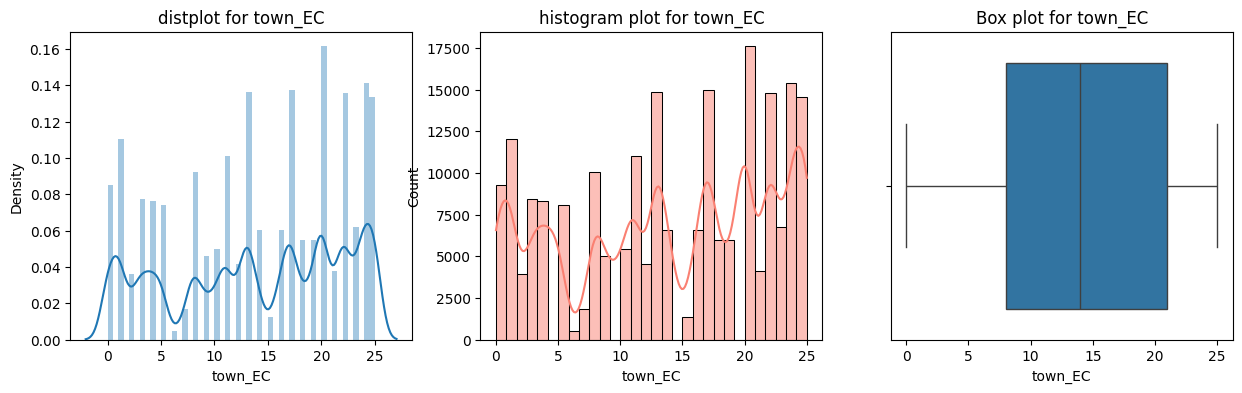

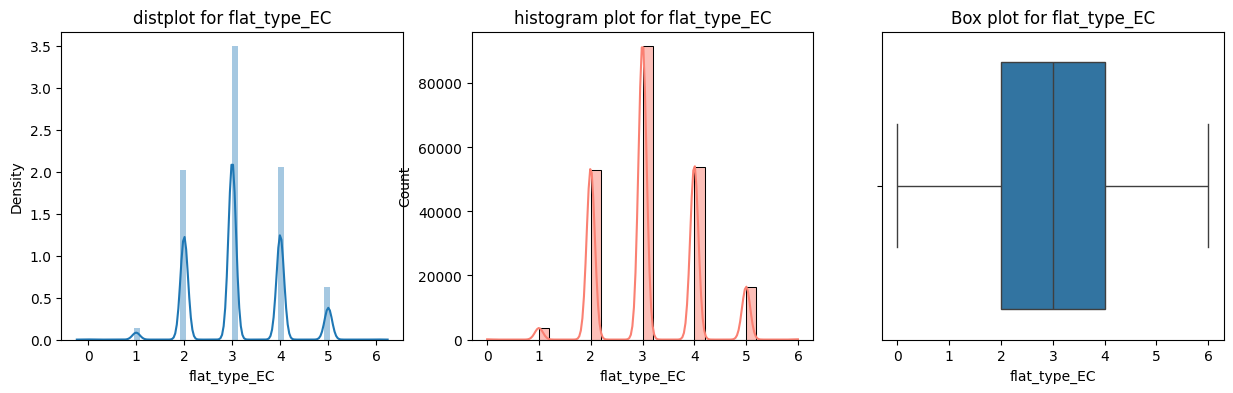

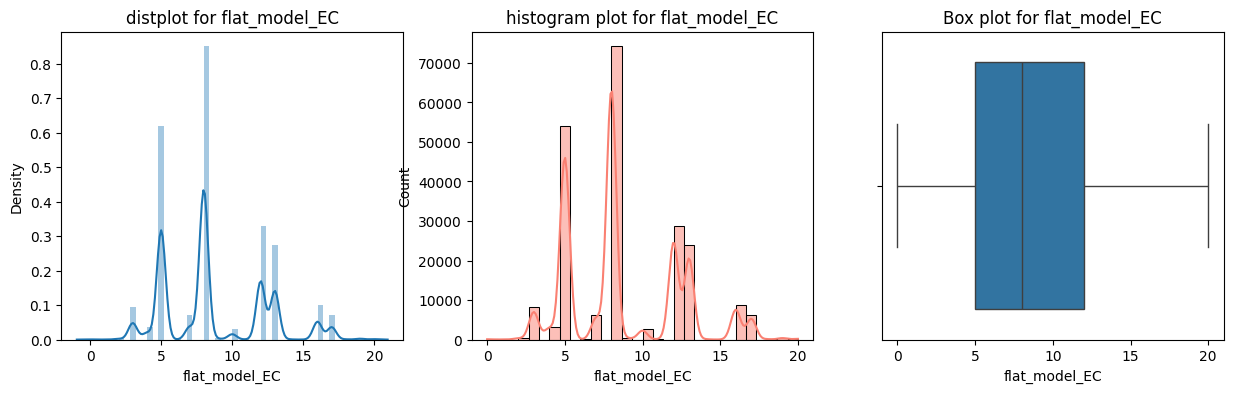

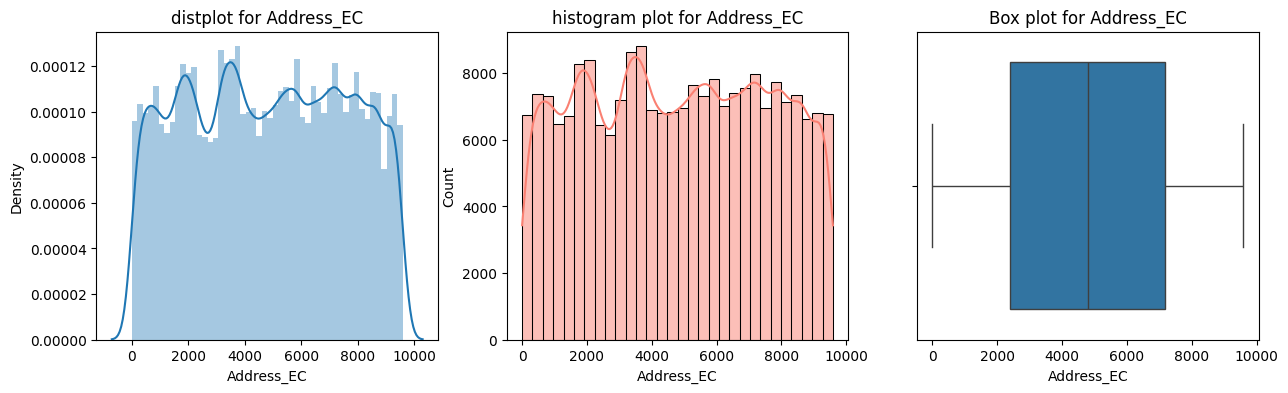

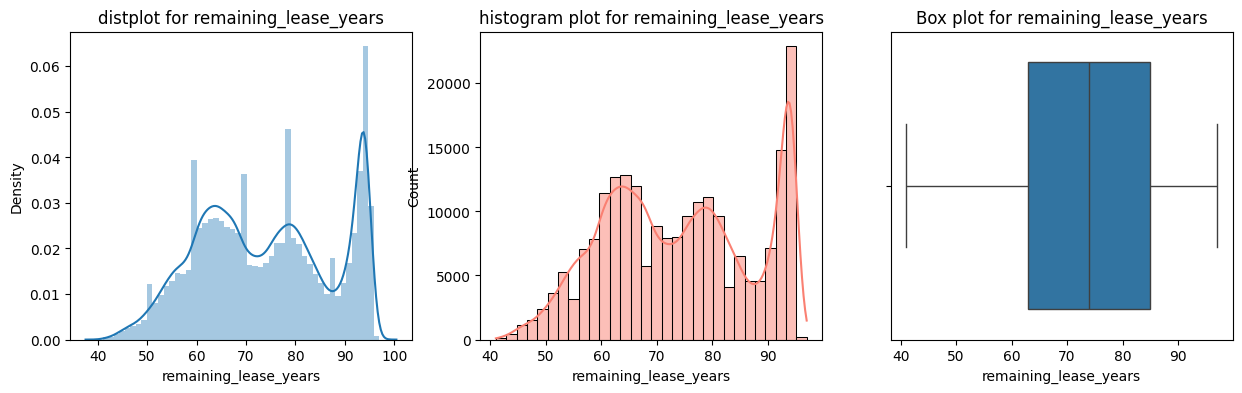

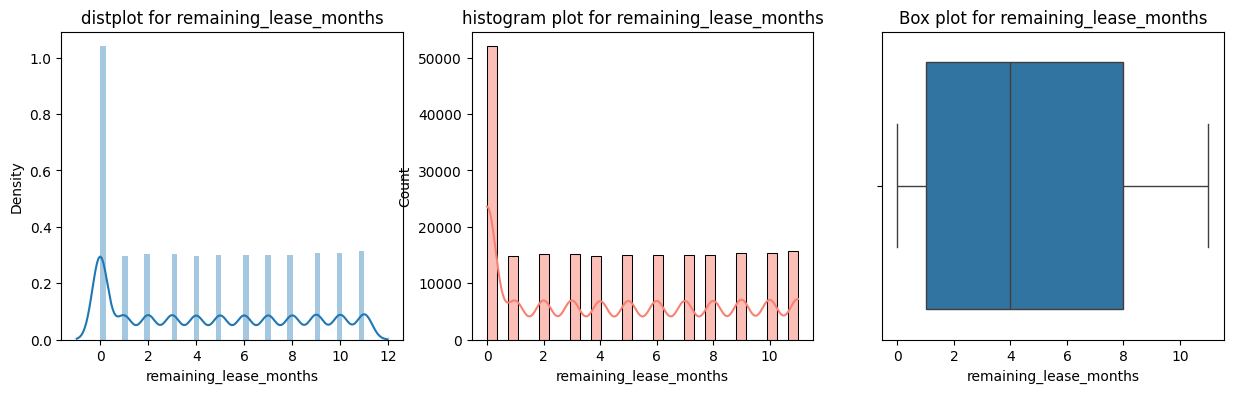

In [44]:
for i in df_dropped.columns:
  plot(df_dropped,i)

In [45]:
df_dropped['resale_price']=np.log(df_dropped['resale_price'])

<ipython-input-31-36a115e74619>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-31-36a115e74619>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-31-36a115e74619>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in s

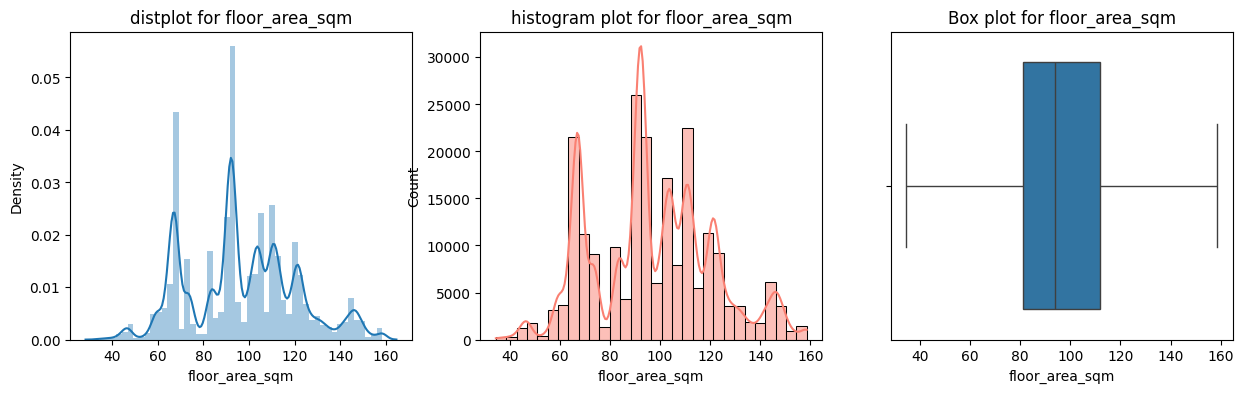

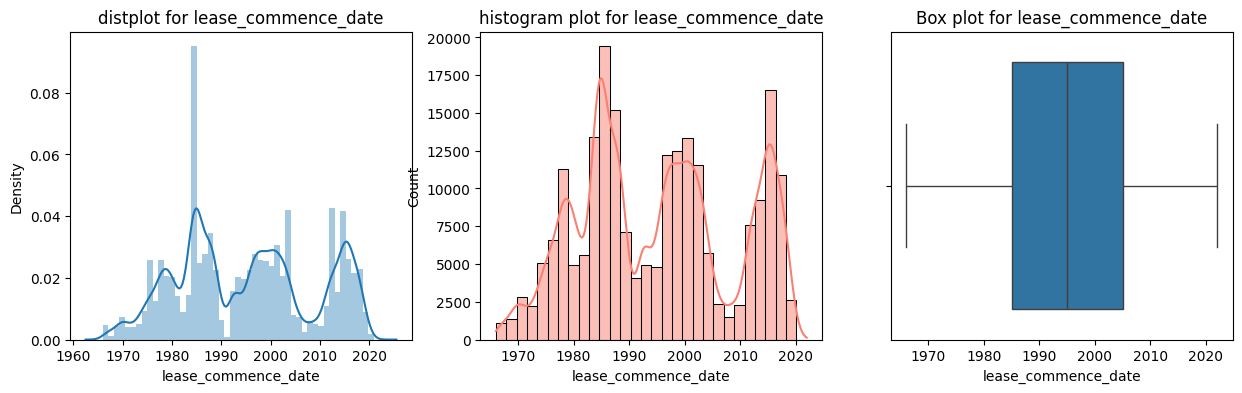

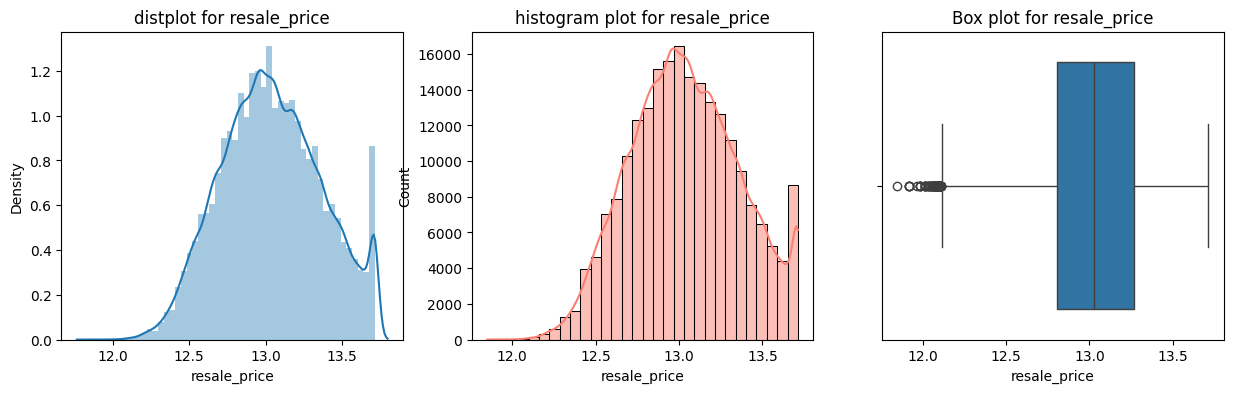

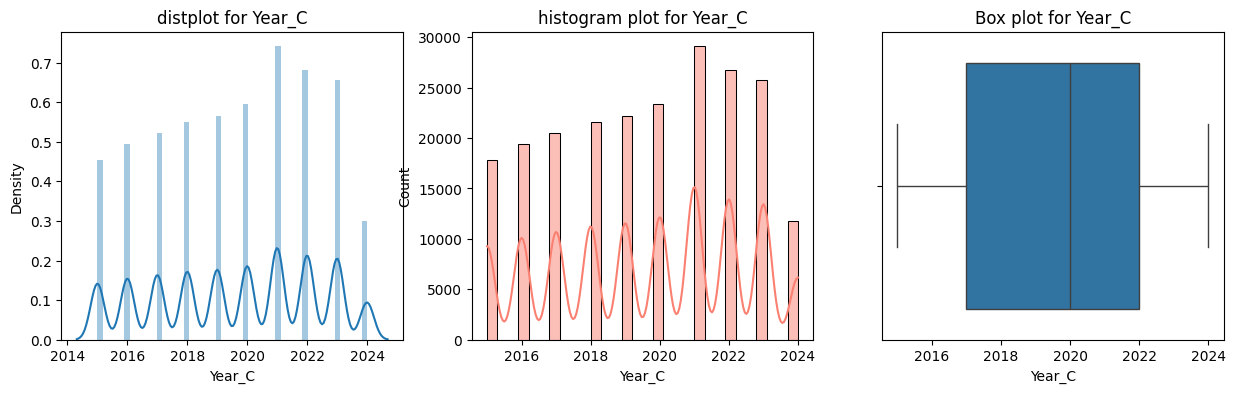

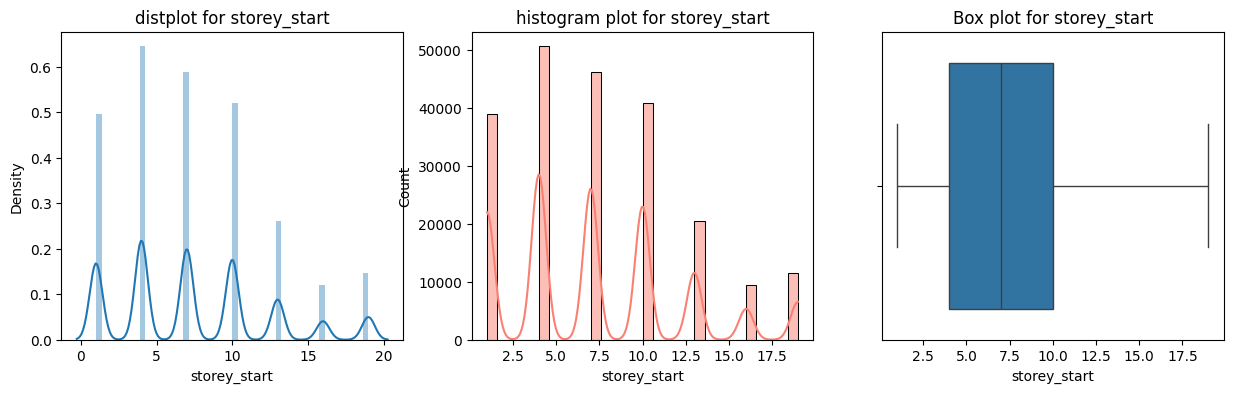

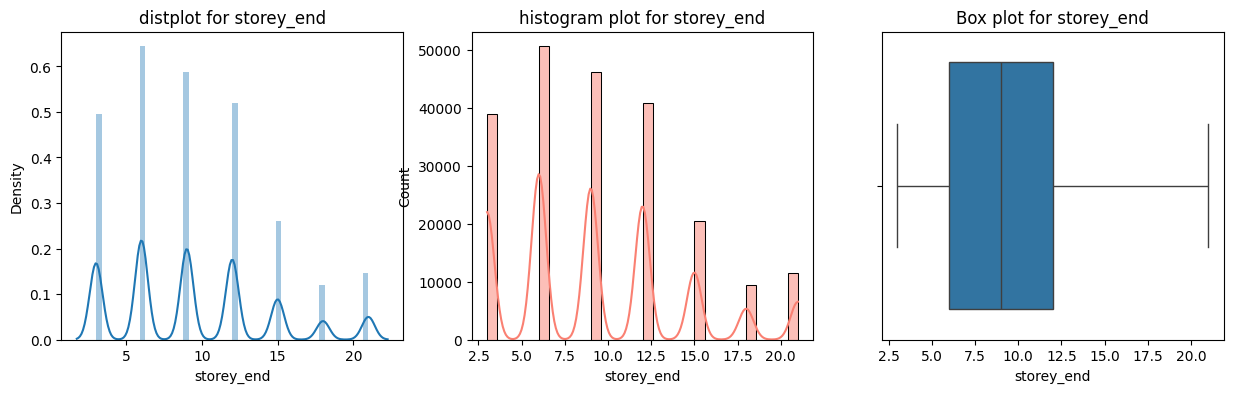

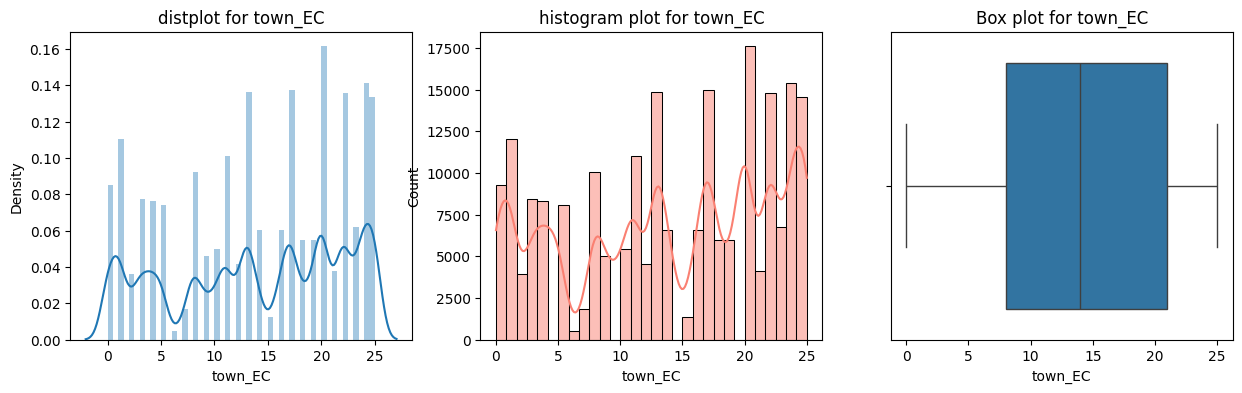

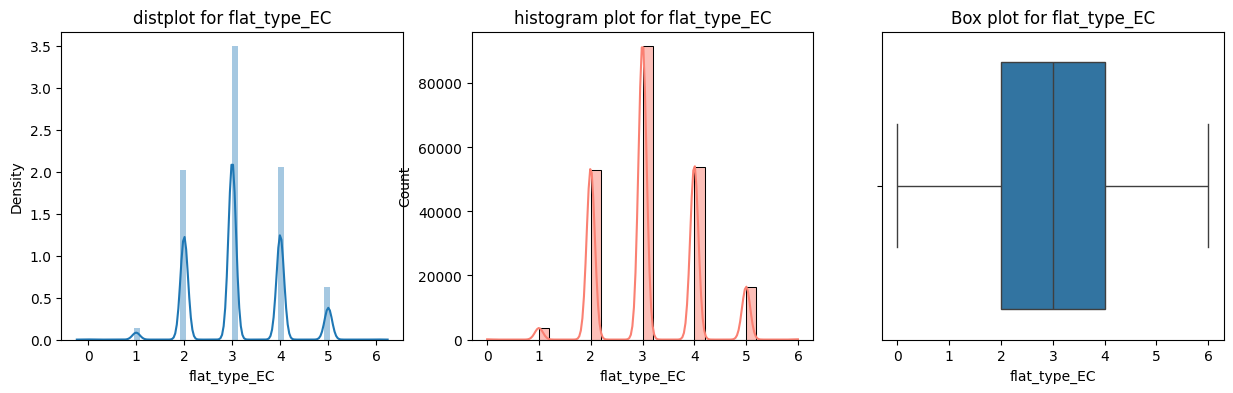

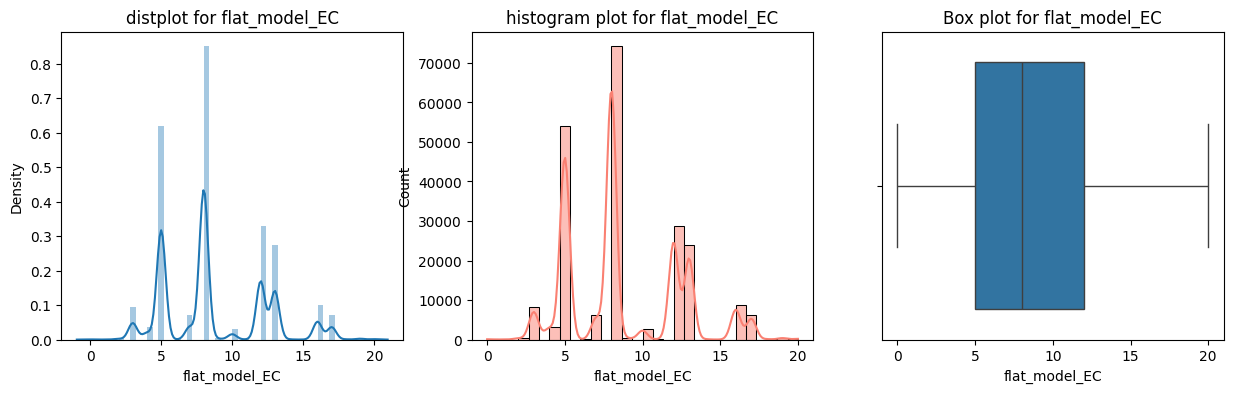

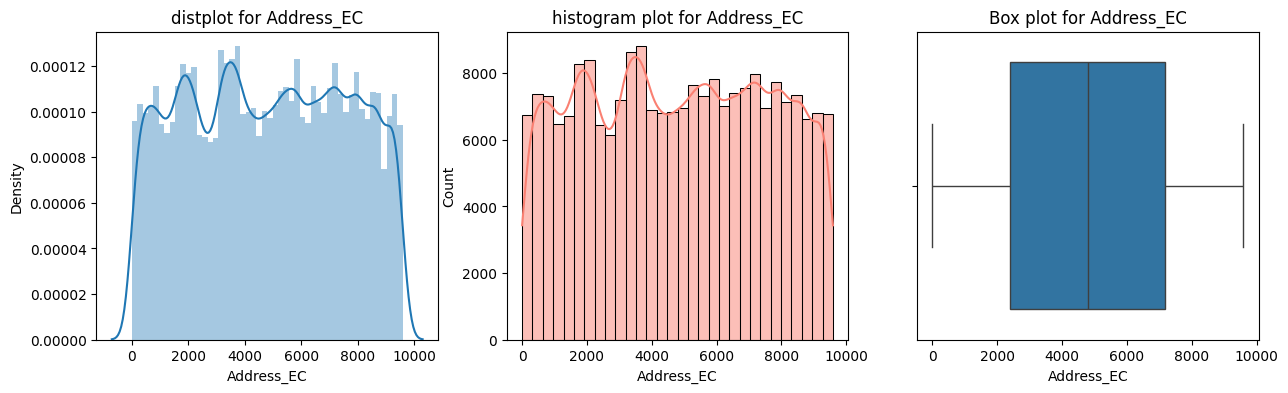

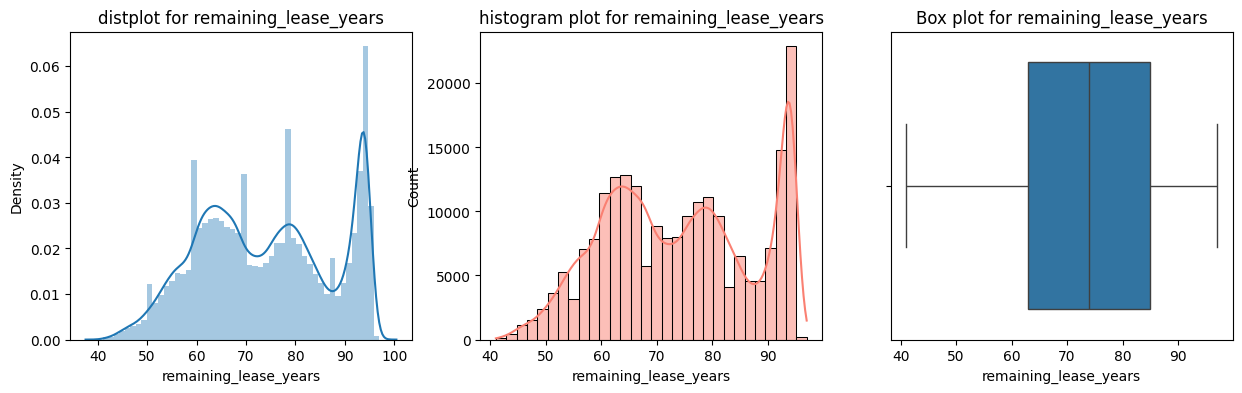

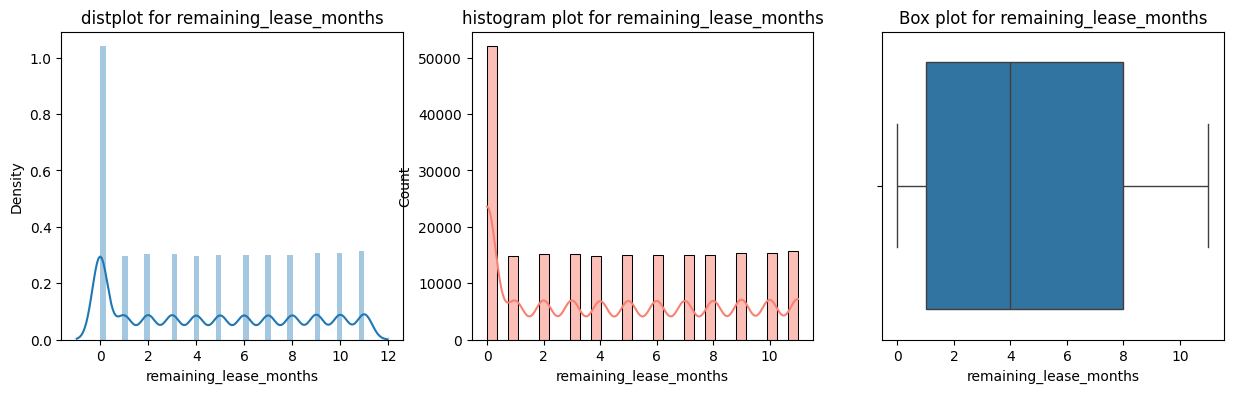

In [46]:
for i in df_dropped.columns:
  plot(df_dropped,i)

In [47]:
for i in df_dropped.columns:
  outlier(df_dropped,i)

<ipython-input-31-36a115e74619>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-31-36a115e74619>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-31-36a115e74619>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in s

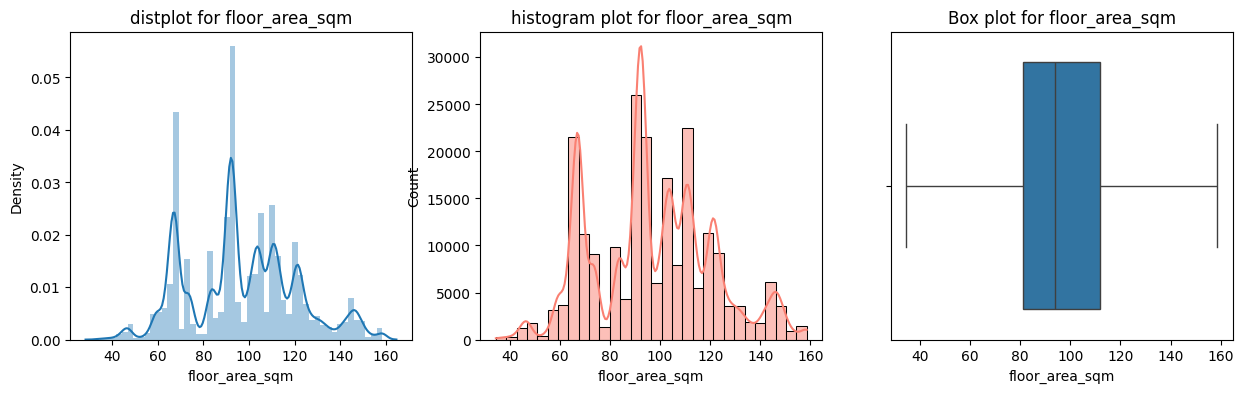

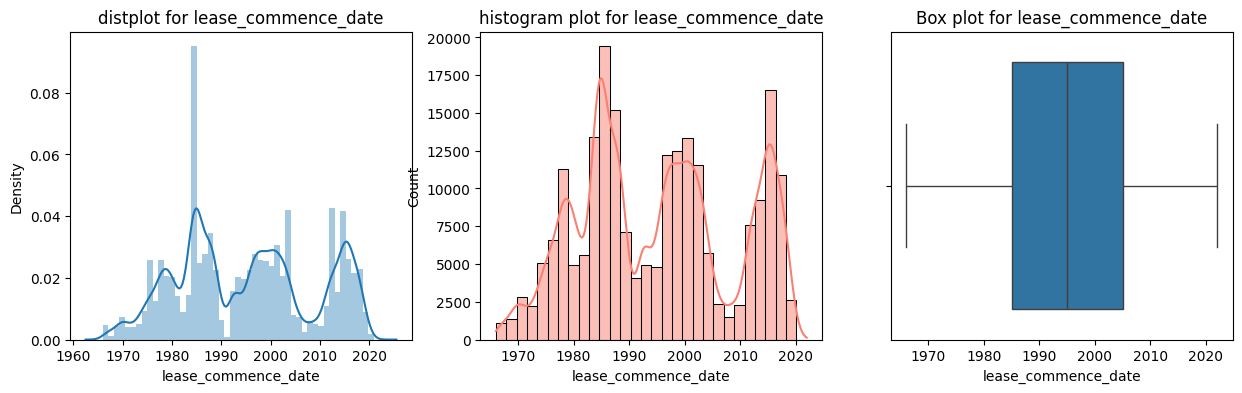

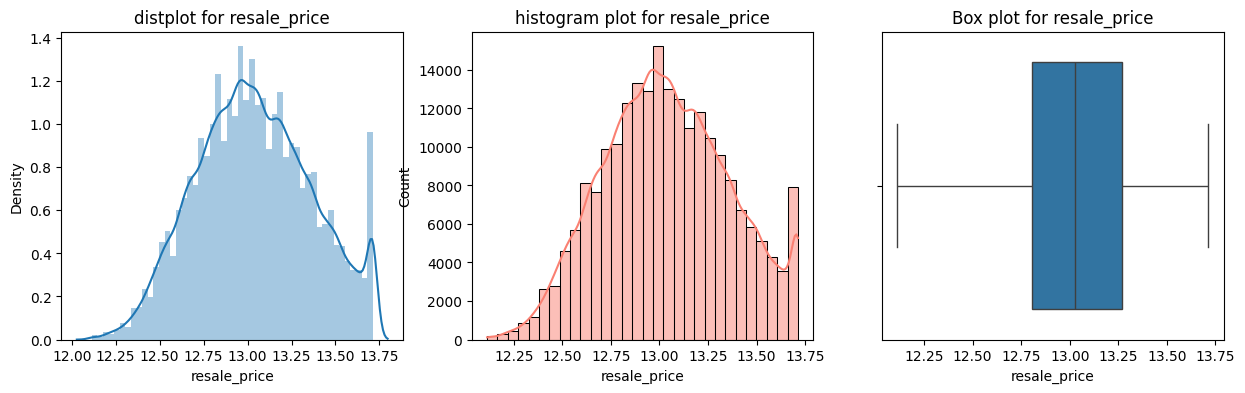

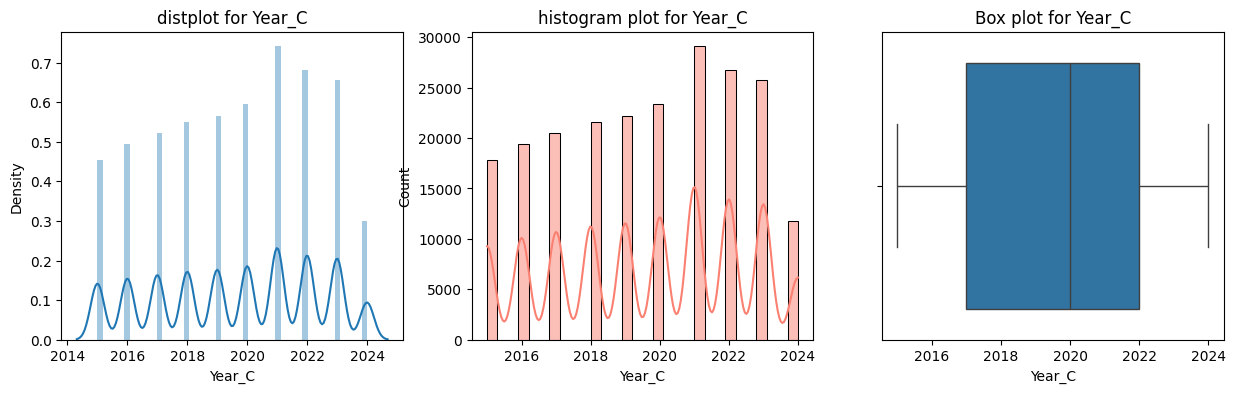

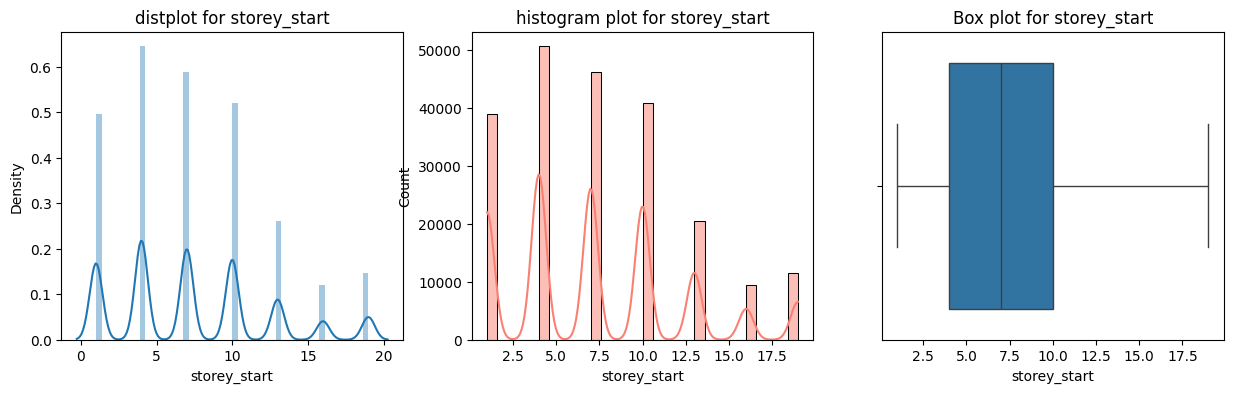

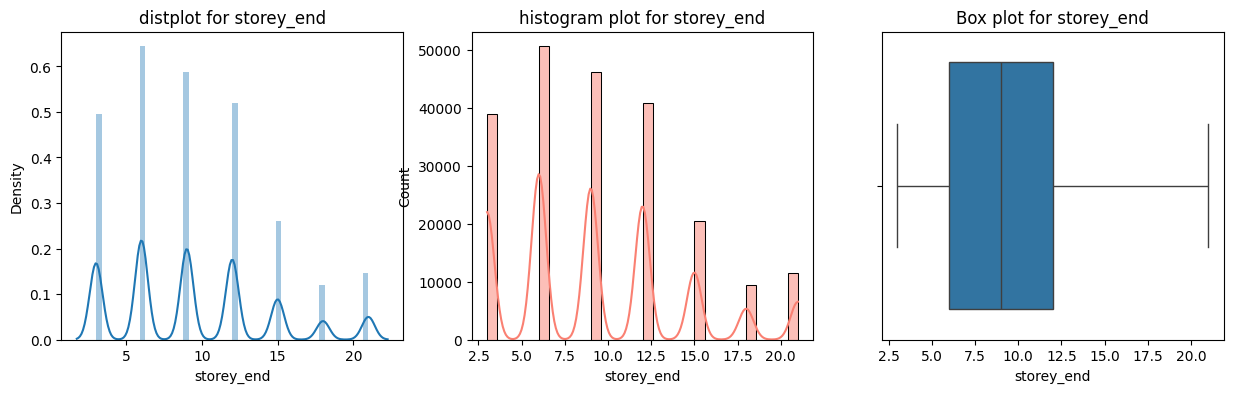

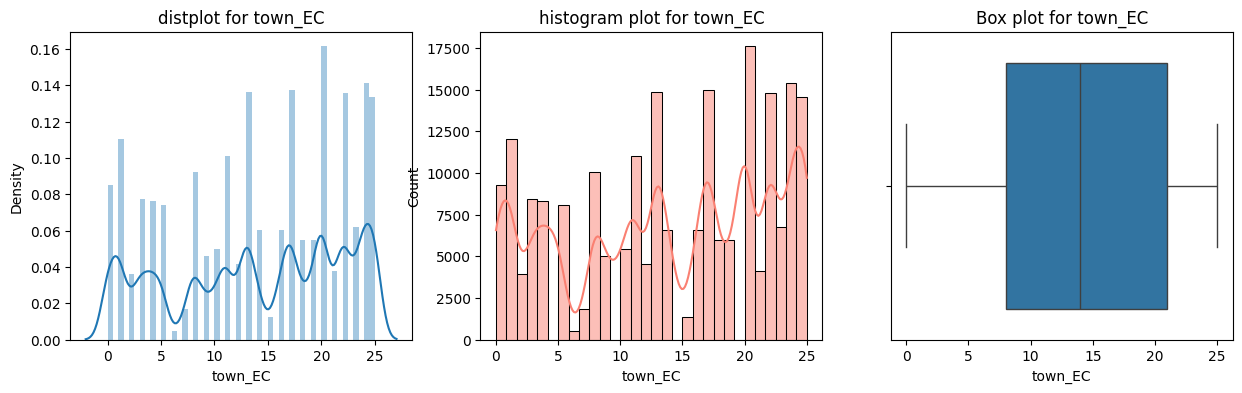

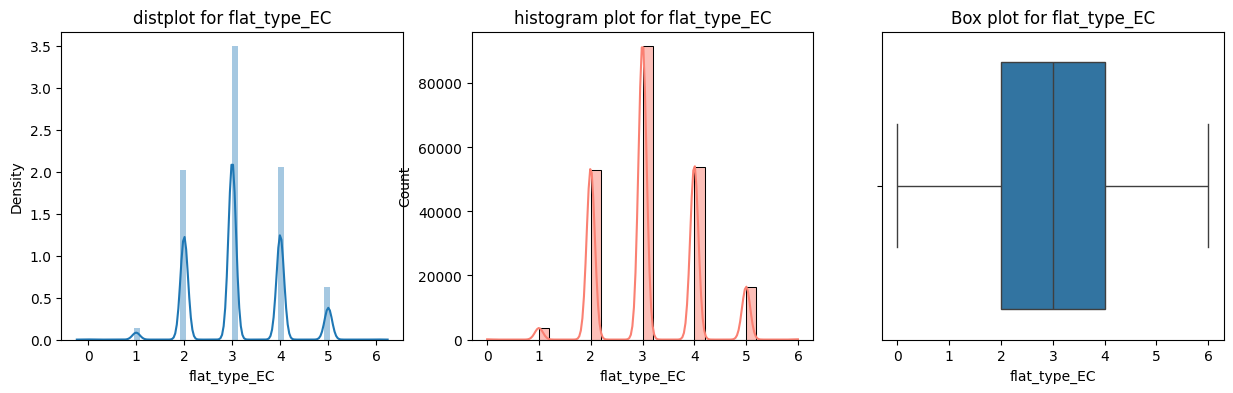

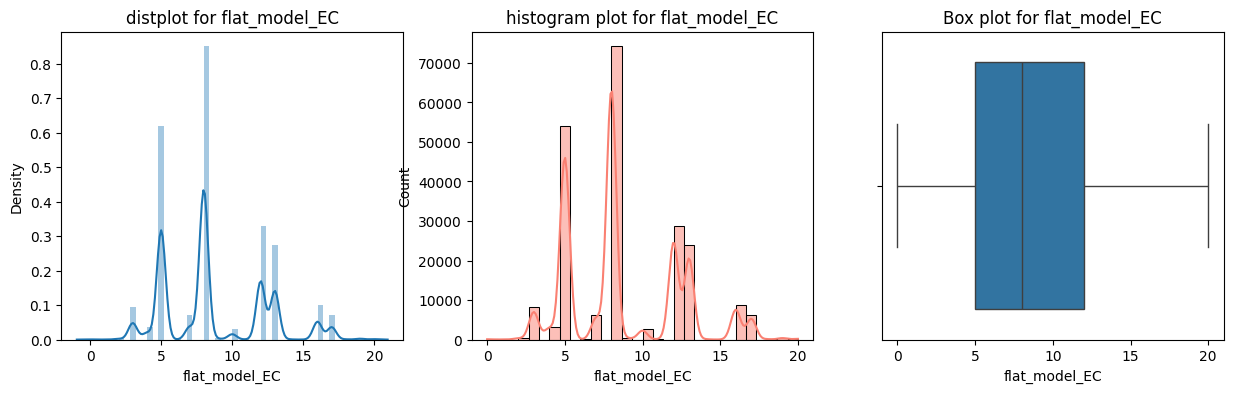

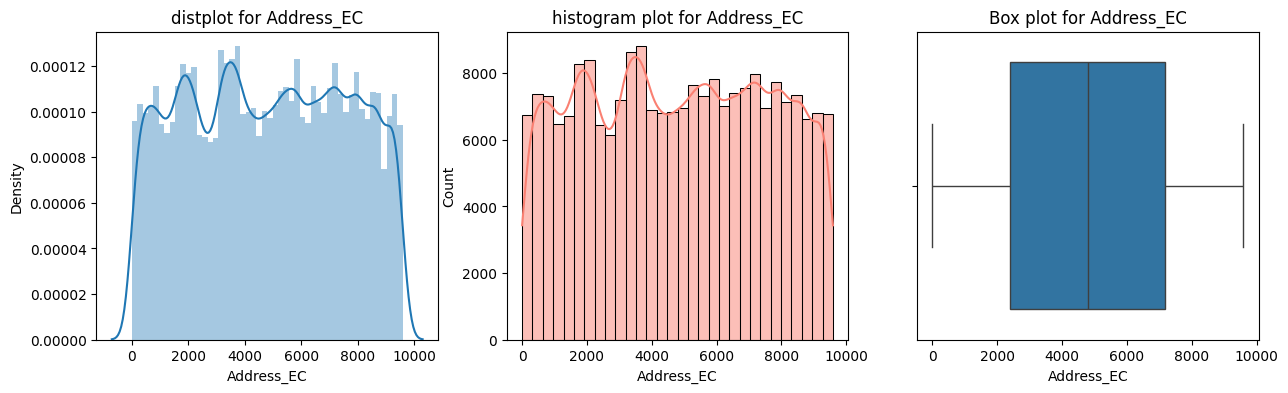

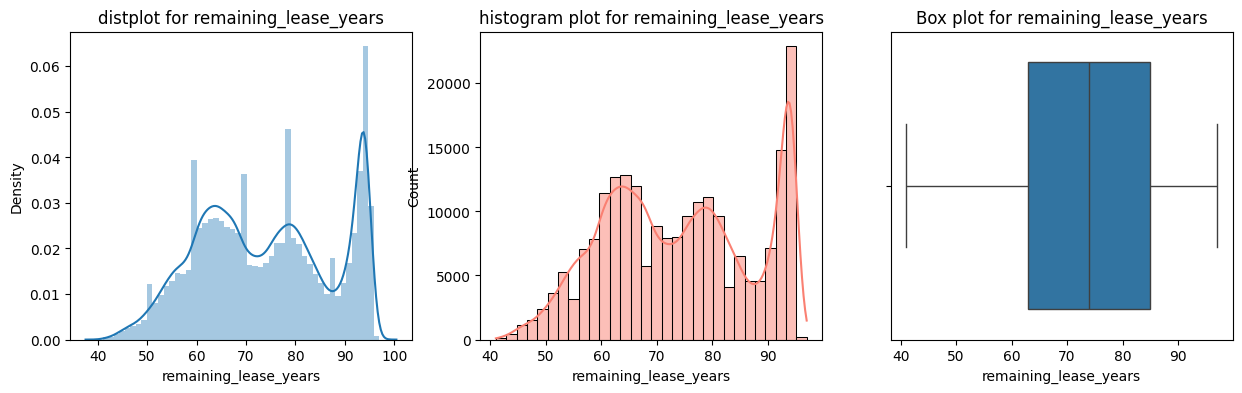

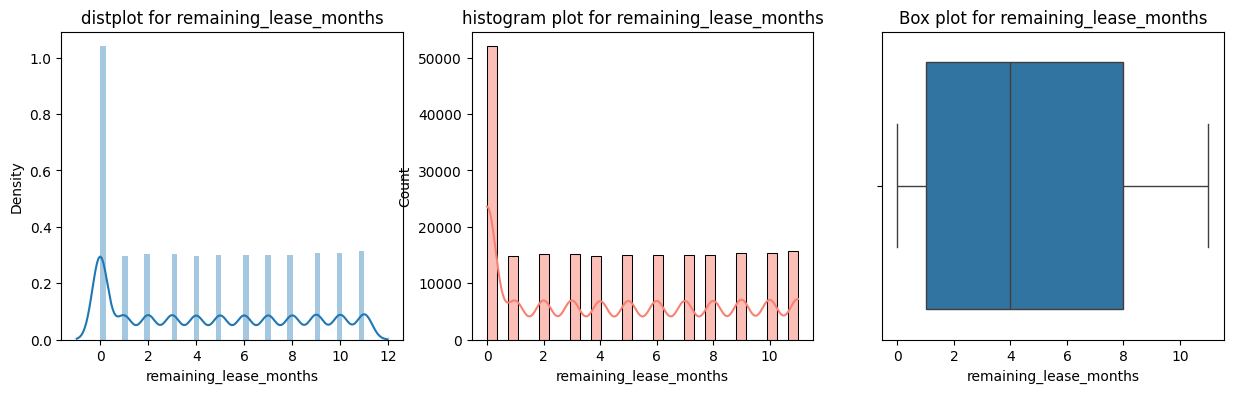

In [48]:
for i in df_dropped.columns:
  plot(df_dropped,i)

In [49]:
final_df = df_dropped.copy()

#  **Model Selection and Training**

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import GridSearchCV
import pickle

In [51]:
algo= [LinearRegression, RandomForestRegressor, DecisionTreeRegressor]

In [52]:
for i in algo:
  print(str(i).split(".")[-1][:-2])

LinearRegression
RandomForestRegressor
DecisionTreeRegressor


In [53]:
final_df.head(2)

floor_area_sqm  lease_commence_date  resale_price  Year_C  storey_start  \
0            60.0                 1986     12.449019    2015             7   
1            68.0                 1981     12.524526    2015             1   

   storey_end  town_EC  flat_type_EC  flat_model_EC  Address_EC  \
0           9        0             2              5        1635   
1           3        0             2             12        6596   

   remaining_lease_years  remaining_lease_months  
0                     70                       0  
1                     65                       0

In [54]:
def accreg(df,algorithm):

  x= df.drop(columns=["resale_price"], axis=1)
  y= df["resale_price"]

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.3, random_state=42)
  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  r2_train= r2_score(y_train, y_pred_train)
  r2_test= r2_score(y_test, y_pred_test)

  mae = mean_absolute_error(y_test, y_pred_test)

  mse_lr = mean_squared_error(y_test, y_pred_test)
  rmse_lr = np.sqrt(mse_lr)


  metrics={"Algorithm":str(algorithm).split(".")[-1][:-2],
           "R2_Train": r2_train,
           "R2_Test": r2_test,
           'Mean Absolute Error' : mae,
           'Mean Squared Error' : mse_lr,
           'Root Mean Squared Error' : rmse_lr
           }
  df_algo = pd.DataFrame(metrics, index=[0])
  return display(df_algo)

In [55]:
for i in algo:
  print(accreg(final_df,i))


Algorithm  R2_Train   R2_Test  Mean Absolute Error  \
0  LinearRegression  0.678243  0.677912             0.144996   

   Mean Squared Error  Root Mean Squared Error  
0             0.03431                 0.185231

None


Algorithm  R2_Train   R2_Test  Mean Absolute Error  \
0  RandomForestRegressor  0.994944  0.965577              0.04403   

   Mean Squared Error  Root Mean Squared Error  
0            0.003667                 0.060555

None


Algorithm  R2_Train   R2_Test  Mean Absolute Error  \
0  DecisionTreeRegressor  0.999637  0.936834             0.057477   

   Mean Squared Error  Root Mean Squared Error  
0            0.006729                 0.082029

None


In [57]:
final_df.head(2)

floor_area_sqm  lease_commence_date  resale_price  Year_C  storey_start  \
0            60.0                 1986     12.449019    2015             7   
1            68.0                 1981     12.524526    2015             1   

   storey_end  town_EC  flat_type_EC  flat_model_EC  Address_EC  \
0           9        0             2              5        1635   
1           3        0             2             12        6596   

   remaining_lease_years  remaining_lease_months  
0                     70                       0  
1                     65                       0

In [58]:
# Separate features and target variable
X = final_df.drop(columns=['resale_price'])
y = final_df['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
y_pred_train= pipeline.predict(X_train)
y_pred_test= pipeline.predict(X_test)

r2_train= r2_score(y_train, y_pred_train)
r2_test= r2_score(y_test, y_pred_test)

mae = mean_absolute_error(y_test, y_pred_test)

mse_lr = mean_squared_error(y_test, y_pred_test)
rmse_lr = np.sqrt(mse_lr)


metrics={"Algorithm": 'RandomForestRegressor',
          "R2_Train": r2_train,
          "R2_Test": r2_test,
          'Mean Absolute Error' : mae,
          'Mean Squared Error' : mse_lr,
          'Root Mean Squared Error' : rmse_lr
          }


In [59]:
rfr_df = pd.DataFrame(metrics, index= [0])
rfr_df

Algorithm  R2_Train   R2_Test  Mean Absolute Error  \
0  RandomForestRegressor  0.994963  0.965718             0.043967   

   Mean Squared Error  Root Mean Squared Error  
0            0.003652                 0.060431

In [60]:
# Hyperparameter tuning for RandomForestRegressor
param_grid = {
    'model__n_estimators': [25,50,100],
    'model__max_features': [ 'sqrt', 'log2'],
    'model__max_depth': [10, 20, 30, 50]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {-grid_search.best_score_}')

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Best Parameters: {'model__max_depth': 50, 'model__max_features': 'sqrt', 'model__n_estimators': 100}
Best Score: 0.05216743971108503
Mean Absolute Error: 0.048879942562897016


In [61]:
# Save the trained model to a file
model_filename = 'Trained_model.pkl'

with open(model_filename, 'wb') as file:
  pickle.dump(best_model, file)

print(f'Model saved to {model_filename}')


Model saved to Trained_model.pkl


In [62]:
# Load the trained model from a file
with open(model_filename, 'rb') as file:
  loaded_model = pickle.load(file)

In [63]:
final_df.head(2)

floor_area_sqm  lease_commence_date  resale_price  Year_C  storey_start  \
0            60.0                 1986     12.449019    2015             7   
1            68.0                 1981     12.524526    2015             1   

   storey_end  town_EC  flat_type_EC  flat_model_EC  Address_EC  \
0           9        0             2              5        1635   
1           3        0             2             12        6596   

   remaining_lease_years  remaining_lease_months  
0                     70                       0  
1                     65                       0

In [64]:
check = [60.0,	1986,	2015,	7,	9, 0,	2, 5, 1635,	70, 0]

predit = loaded_model.predict([check])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [65]:
a = predit[0]
b = np.exp(a)
c = round(b,3)

print(a)
print(c)

12.547824373627636
281482.167


# Streamlit part

In [66]:
!pip install streamlit
!pip install streamlit-option-menu
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.4/823.4 kB 9.6 MB/s eta 0:00:00


In [67]:
final_df.to_csv('FinalData.csv', index=False)

In [68]:
final_df['remaining_lease_years'].min()

41

In [69]:
final_df['remaining_lease_years'].max()

97

In [70]:
final_df['remaining_lease_years'].median()

74.0

In [77]:
%%writefile ResaleFlatPrice.py

# Packages

import pandas as pd
import numpy as np
import streamlit as st
import pickle
import numpy as np
import sklearn
from streamlit_option_menu import option_menu

st.set_page_config(layout="wide")

st.title(":rainbow[**SINGAPORE RESALE FLAT PRICES PREDICTING**]")


st.header(":rainbow[]",  divider='rainbow')

select= option_menu(None, ["Price Prediction"],
                    icons=['gear'], menu_icon="cast", default_index=0, orientation="horizontal",
                    styles={
                            "container": {"padding": "0!important", "background-color": "#17202A"},
                            "icon": {"color": "#9A7D0A", "font-size": "25px"},
                            "nav-link": {"font-size": "25px", "text-align": "left", "margin":"0px", "--hover-color": "#808080"},
                            "nav-link-selected": {"background-color": "#808000"},
                        })

if select == "Price Prediction":

  df = pd.read_csv('FinalData.csv')

  col1,col2,col3,col4= st.columns(4)
  with col1:
    yr = df['Year_C'].unique()
    yr.sort()

    year= st.selectbox("Select the Year", yr)

  with col2:
    ft = df['flat_type_EC'].unique()
    ft.sort()

    flat_type= st.selectbox("Select the Flat Type", ft)

  with col3:
    tw = df['town_EC'].unique()
    tw.sort()

    town = st.selectbox("Select the Town", tw)

  with col4:
    fm = df['flat_model_EC'].unique()
    fm.sort()

    flat_model= st.selectbox("Select the Flat Model", fm)

  col1,col2,col3,col4= st.columns(4)
  with col1:
    lcd = df['lease_commence_date'].unique()
    lcd.sort()

    les_coms_dt= st.selectbox("Select the Lease_Commence_Date", lcd)

  with col2:
    addr = df['Address_EC'].unique()
    addr.sort()

    address = st.selectbox("Select the Address", addr)

  with col3:
    flr_area_sqm= st.number_input("Enter the Value of Floor Area sqm", min_value= df['floor_area_sqm'].min(), max_value= df['floor_area_sqm'].max(),
                                  value = df['floor_area_sqm'].mean())

  with col4:
    stry_start= st.number_input("Enter the Value of Storey Start")

  col1,col2,col3= st.columns(3)
  with col1:
    stry_end= st.number_input("Enter the Value of Storey End")

  with col2:
    re_les_year= st.number_input("Enter the Value of Remaining Lease Year", min_value= df['remaining_lease_years'].min(),
                                 max_value= df['remaining_lease_years'].max(), value = df['remaining_lease_years'].min())

  with col3:
    re_les_month= st.number_input("Enter the Value of Remaining Lease Month", min_value= df['remaining_lease_months'].min(),
                                 max_value= df['remaining_lease_months'].max(), value = df['remaining_lease_months'].min())

  button= st.button(":green[Predict the Price]")

  if button:
    with open("/content/Trained_model.pkl","rb") as f:
      model_regg=pickle.load(f)

    price= [flr_area_sqm, les_coms_dt, year, stry_start, stry_end, town,  flat_type, flat_model, address,
            re_les_year, re_les_month]

    y_pred= model_regg.predict([price])
    a=int(y_pred[0])
    a2=np.exp(a)
    a3=round(a2,3)

    st.title(f":green[**The Selling Price is : {a3}**]")

Overwriting ResaleFlatPrice.py


In [73]:
!streamlit run ResaleFlatPrice.py&>/dev/null&

In [74]:
!ngrok config add-authtoken 2ciFzJOr8PUy2NH2wKDfMLha8rG_6y1YLoW7AgXxQmuFFGJsU

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [76]:
from pyngrok import ngrok

public_url = ngrok.connect(addr='8501')
print(public_url)

NgrokTunnel: "https://66ab-34-91-110-190.ngrok-free.app" -> "http://localhost:8501"
